In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 12
pd.options.display.max_columns = None

In [2]:
# UPDATE PATH TO WHERE YOU HAVE THE DATA FILE
path = './'
df = pd.read_csv(path+'transcoding_mesurment.tsv', sep='\t')
print('\nNumber of rows and columns in the data set: ',df.shape)


Number of rows and columns in the data set:  (68784, 22)


# Data Exploration

In [6]:
df.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [9]:
df.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


Text(0.5, 1.0, 'Missing value in the dataset')

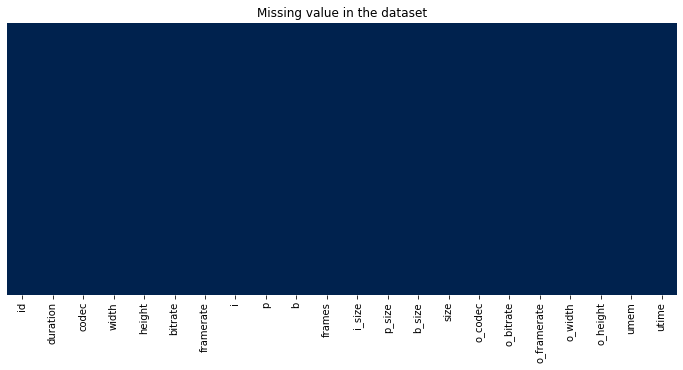

In [29]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),cbar=False,cmap='cividis',yticklabels=False)
plt.title('Missing value in the dataset')

There are no missing values in this data set.

# Question 1

Text(0.5, 1.0, 'Heatmap of Pearson Correlation Matrix for Video Transcoding Time Dataset')

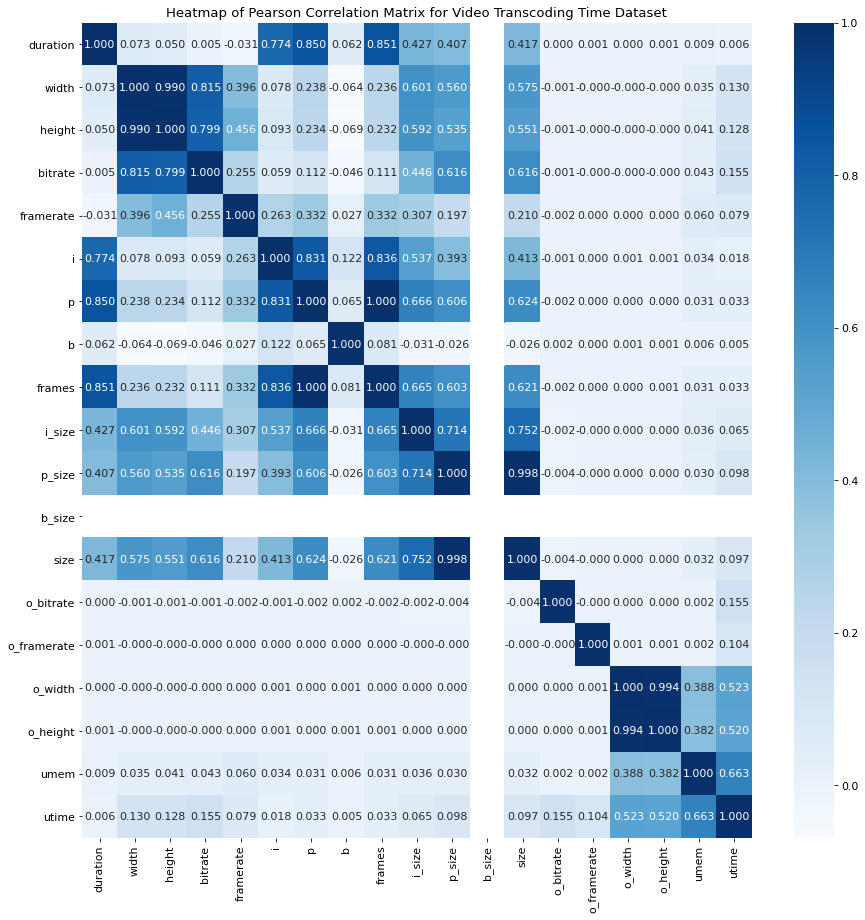

In [59]:
# Question 1: Heatmap of Pearson correlation matrix
corr = df.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt='.3f')
plt.title("Heatmap of Pearson Correlation Matrix for Video Transcoding Time Dataset")

Out of the features we are interested in inspecting, it looks like the features “o_width” and “o_height” have the highest absolute correlation with the target variable “utime” at 0.523 and 0.520 respectively. In the context of linear regression, this implies that the target variable appears to have a strong dependency on these features, and it would make sense to more heavily weight these features to get the best linear regression model possible. It makes sense that the total transcoding time would be heavily affected by the height and width of the output video. Larger output height and width values would mean that the output video has more pixels to transcode and therefore take longer to transcode. While “umem”, the total codec allocated memory for transcoding, is not a feature we will work with directly, it makes sense that the amount of memory allocated would be heavily correlated with the total transcoding time because we expect a video that is larger in memory size to take longer to transcode.

After these features that have the highest and most obvious absolute correlation to the target variable, the next most correlated features are “bitrate”, “o_bitrate”, “width”, and “height”. We have already seen that the output width and height have a relatively strong correlation to the total transcoding time, so it makes sense that the input width and height also show some correlation to the total transcoding time. It also makes sense that higher input and output bitrates would lead to longer total transcoding times. Higher bitrates means more pixels, bits, or information to process, which would lead to more memory and more time being used.

# Question 2

In [39]:
# Question 2: Histogram of numerical features
# Numerical features (17): duration, height, width, bitrate, framerate, i, p, b, frames,
#                          i_size, p_size, b_size, size, o_bitrate, o_framerate, o_width, o_height
plt.rcParams['font.size'] = 16

def threeplots(data):
    f=plt.figure(figsize=(24,7))
    ax1=f.add_subplot(131)
    sns.histplot(data, kde=True, color='r',ax=ax1)
    ax1.set_title('Histogram of %s' % data.name)
    plt.xticks(rotation=45, fontsize=12)
    
    ax2=f.add_subplot(132)
    sns.histplot(data, kde=True, color='b', log_scale=True, ax=ax2)
    ax2.set_title('Histogram of %s (log10)' % data.name)
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel('%s (log10)' % data.name)
    
    data_bc, lam, ci= boxcox(data, alpha=.05)
    ax3=f.add_subplot(133)
    sns.histplot(data_bc, kde=True, color='g', ax=ax3)
    ax3.set_title('Histogram of %s (Box-Cox)' % data.name)
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel('%s (Box-Cox)' % data.name)

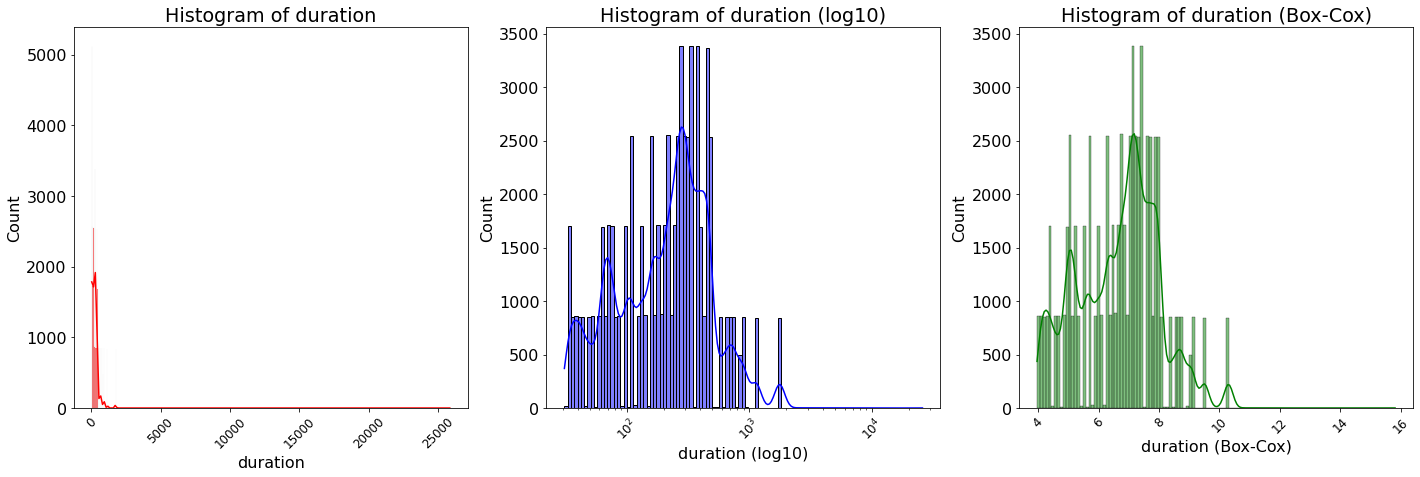

In [21]:
threeplots(df['duration'])

Plotting the histogram of “duration”, we see that this feature has high skewness with the vast majority of the data points clustered under the 1000 sec threshold. So, applying a log transformation here could help to make the distribution resemble more of a normal or Gaussian distribution, as seen above. This is relevant because normality is an important assumption for many statistical analysis methods, including linear regression, which we want to use. A log scale helps to provide more differentiation between the smaller values while also reducing the differentiation between the larger values. The Box-Cox transformation is another transformation that can be applied to skewed data to make it more normal or Gaussian (the log transformation can be considered a subset of the Box-Cox transformation where lambda=0). In general, the Box-Cox transformation tends to perform better than the log transformation in making the distribution approximate a normal or Gaussian distribution. So, we will choose to use the Box-Cox transformation for numerical features that need to be normalized (exceptions will be noted).

There are other features that display a distribution or histogram similar to “duration”. All of these features have relatively high skewness, with the vast majority of data points clustered on the lower end of the spectrum. We can apply a log transformation or Box-Cox transformation to cause these features to exhibit a distribution closer to a normal or Gaussian distribution.

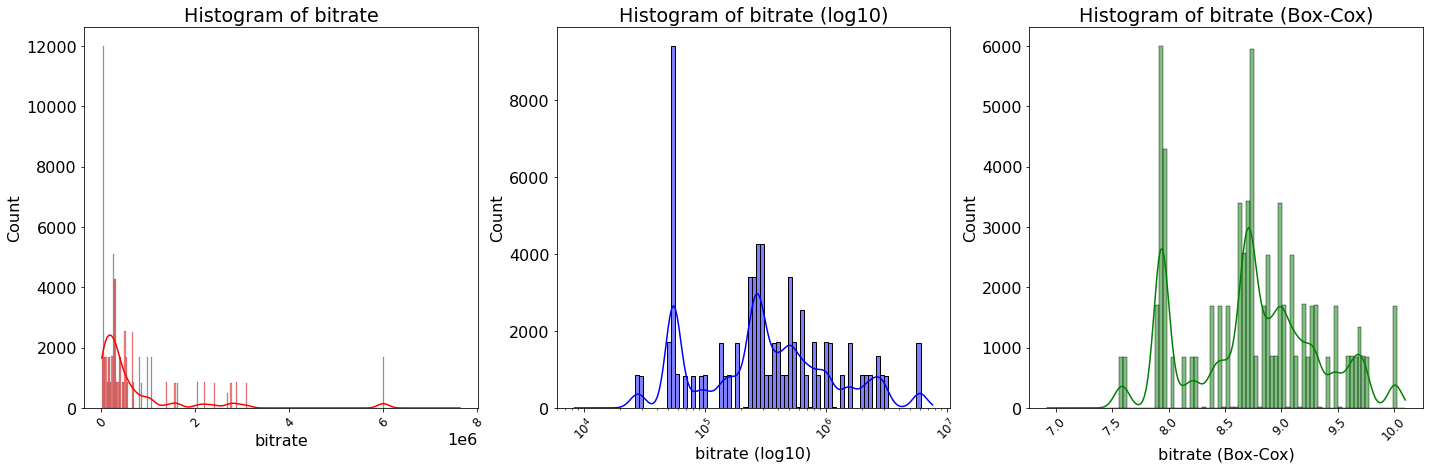

In [22]:
threeplots(df['bitrate'])

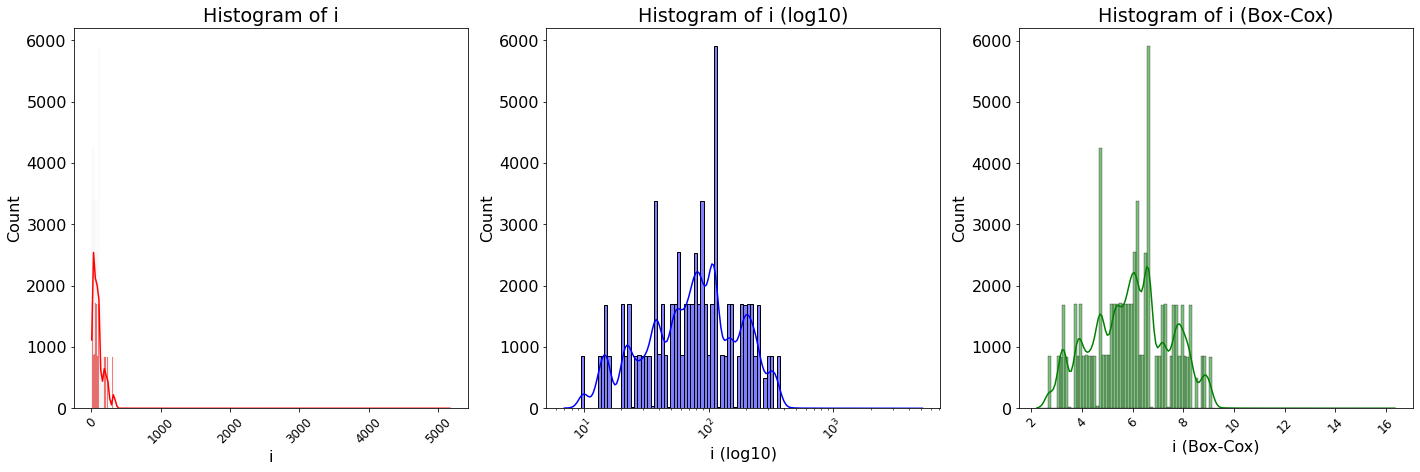

In [23]:
threeplots(df['i'])

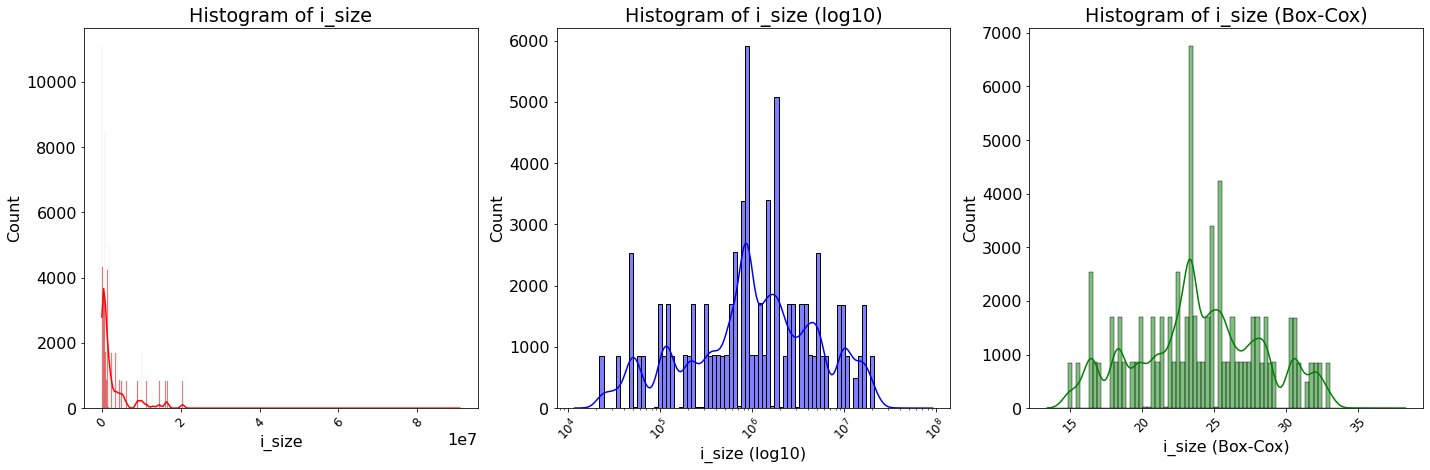

In [24]:
threeplots(df['i_size'])

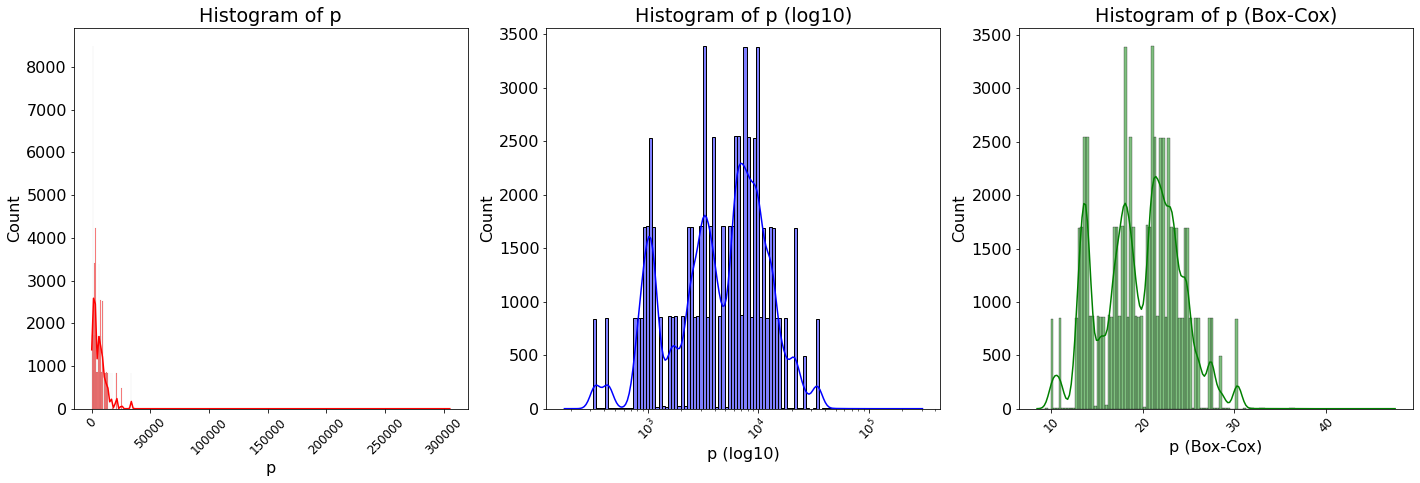

In [25]:
threeplots(df['p'])

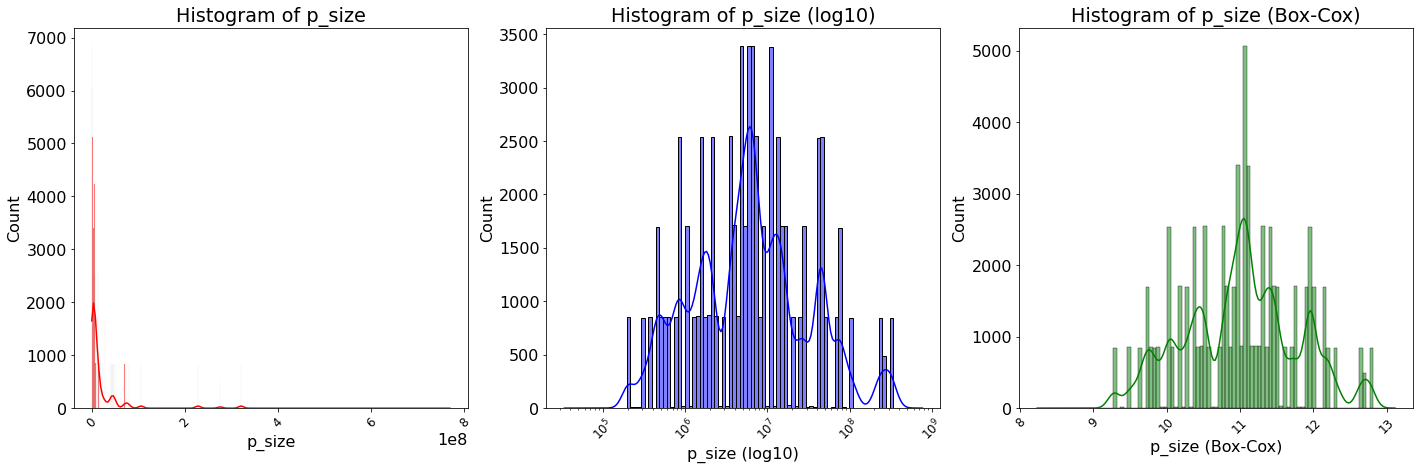

In [26]:
threeplots(df['p_size'])

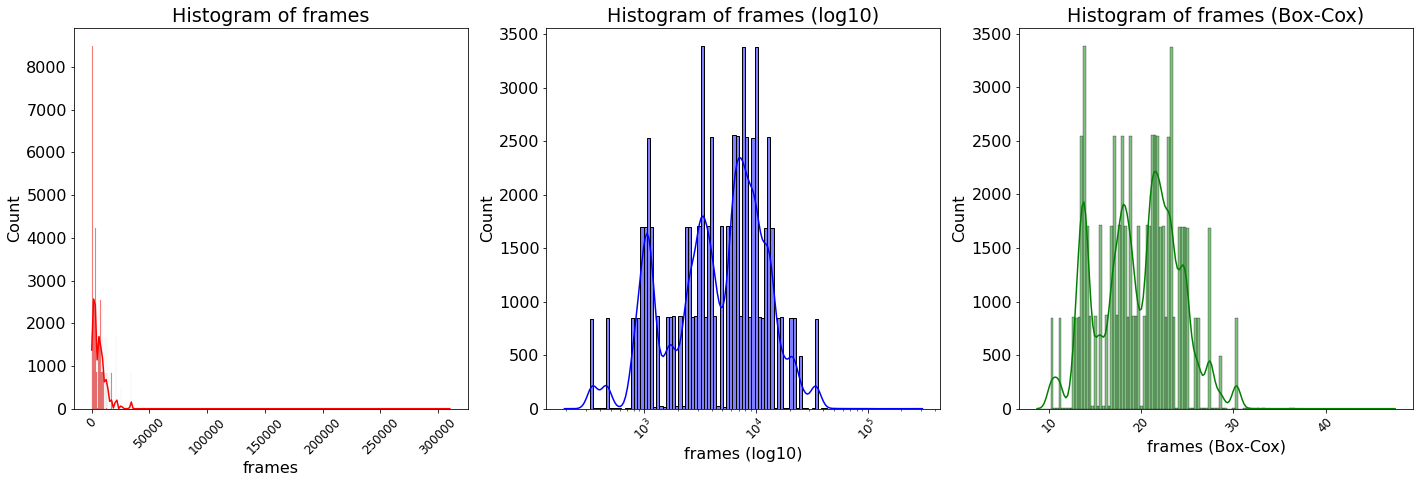

In [27]:
threeplots(df['frames'])

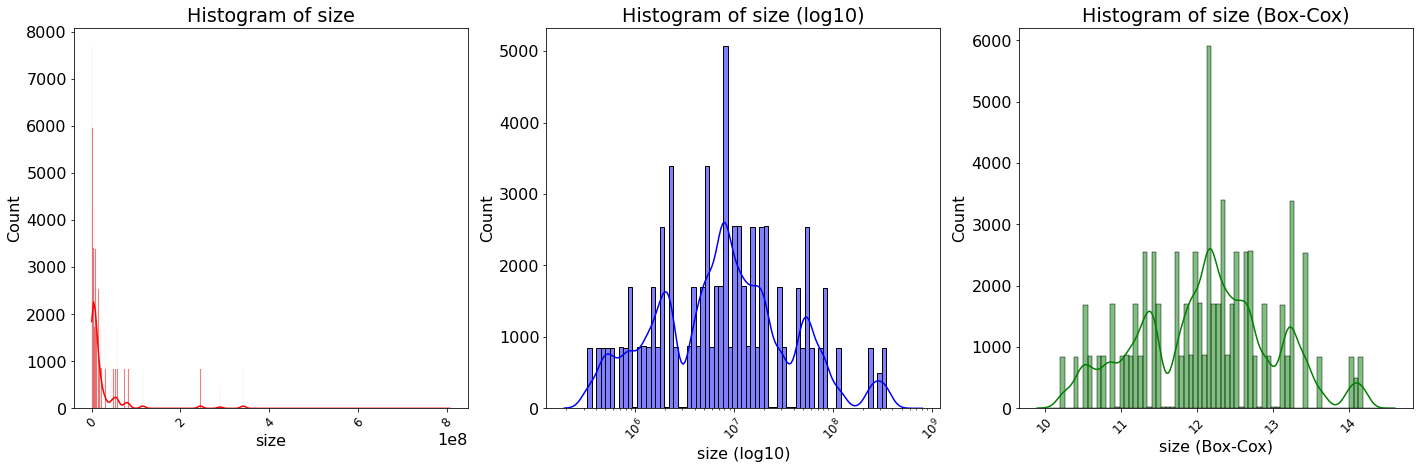

In [28]:
threeplots(df['size'])

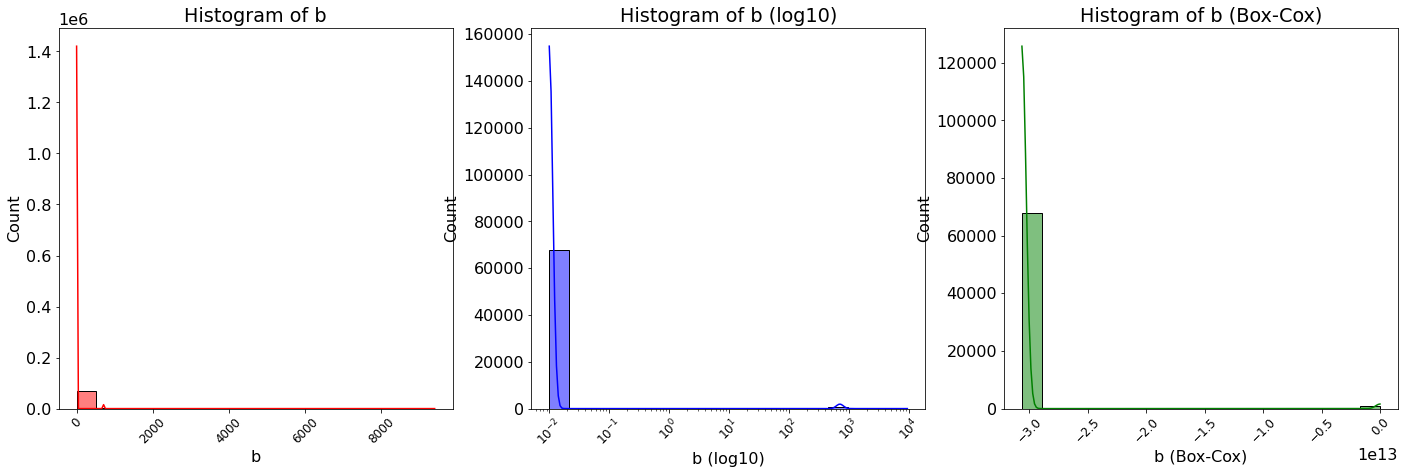

In [37]:
b = df['b']
b.replace(to_replace=0,value=0.01,inplace=True)
threeplots(b)

The feature “b”, which represents the number of b frames in the video, where b frames can use both previous and forward frames for data reference to get the highest amount of data compression, is not as well behaved as the features we have discussed so far. This feature is highly skewed, with most of the data points clustered on the lower end of the spectrum and only a few points at the highest end of the spectrum. However, the majority of the data points have a 0 value (b=0). Indeed, only 859 of the data points out of the close to 69,000 points in the original dataset have a nonzero value. All the zero values make applying a log transformation or Box-Cox transformation nontrivial since these transformations are not well-defined when the input values are 0. To apply these transformations, we could replace all the 0 values with an infinitesimally small value. To get an idea of how these transformations would perform, we replaced all the 0 values with 0.01, which is 2 orders of magnitude smaller than the smallest nonzero value, 6. You can see from the figure above that the distribution of “b” is still quite skewed, even with the transformations, since so many of the values are zero.

For “b_size”, which represents the total size in bytes of the b frames in the video, all the data points in the original dataset had a value of 0. This fact could be the result of a mistake when the data was pulled or captured since we see above that some of the videos do have b frames. Nevertheless, since b_size=0 for all data points, this feature does not provide us any additional information and we can eliminate it from our feature pool.

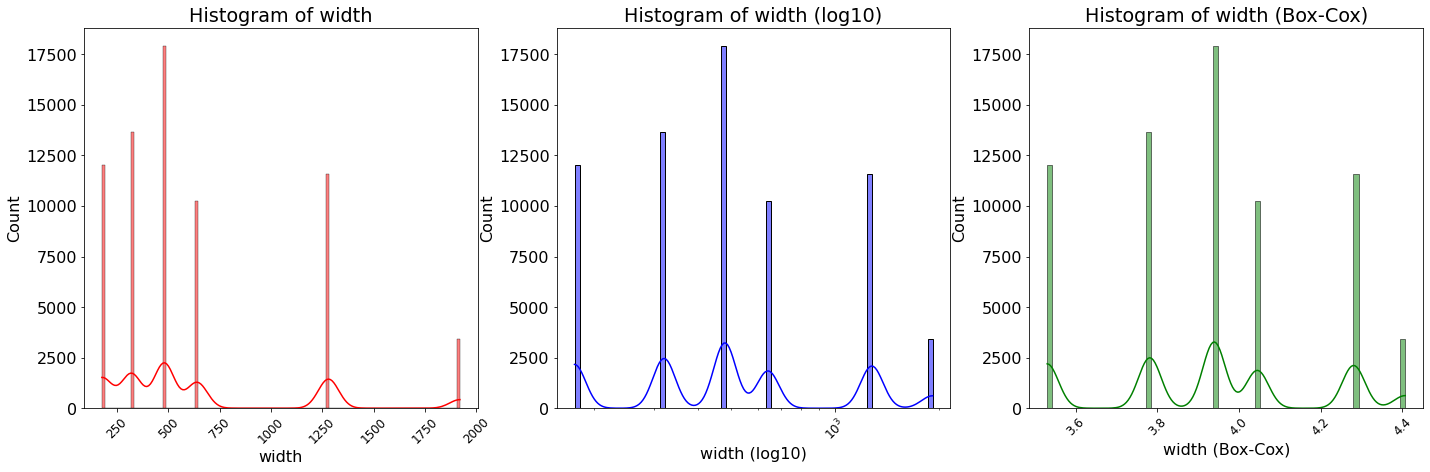

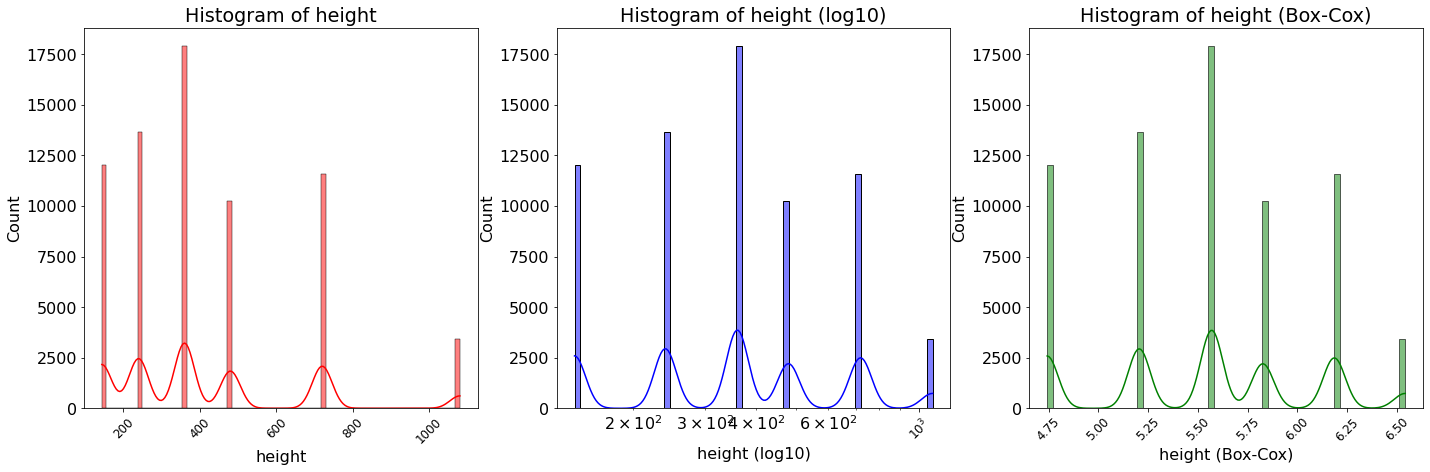

In [40]:
threeplots(df['width'])
threeplots(df['height'])

Text(0.5, 0, 'height (pixels)')

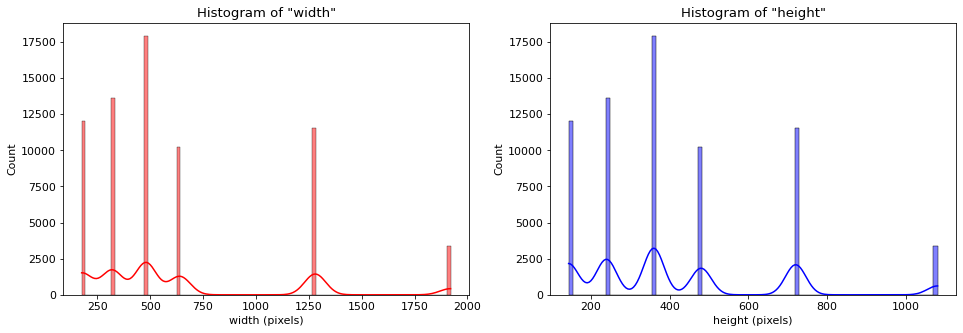

In [20]:
f = plt.figure(figsize=(16,5))
ax = f.add_subplot(121)
sns.histplot(data=df, x='width', kde=True, color='red')
ax.set_title('Histogram of "width"')
ax.set_xlabel('width (pixels)')

ax = f.add_subplot(122)
sns.histplot(data=df, x='height', kde=True, color='blue')
ax.set_title('Histogram of "height"')
ax.set_xlabel('height (pixels)')

The histograms of “width” and “height” show some skewness with more points on the lower end of the spectrum. Width and height appear to be highly correlated to one another with nearly identical looking histograms. This makes sense because there are standard video sizes that most videos abide by. Therefore, given a certain width, the height is almost always known and vice versa (e.g. width=1920 pixels, height=1080 pixels). In some ways, it could be argued that width and height could be considered categorical features since it appears that basically all the data points fall into one of six categories. However, because the relative distance in numerical value of pixels could provide some additional information in determining the target variable, total transcoding time, we will keep these two features as numerical features, although one could be eliminated by the pandas.get_dummies() function since the two are so correlated.

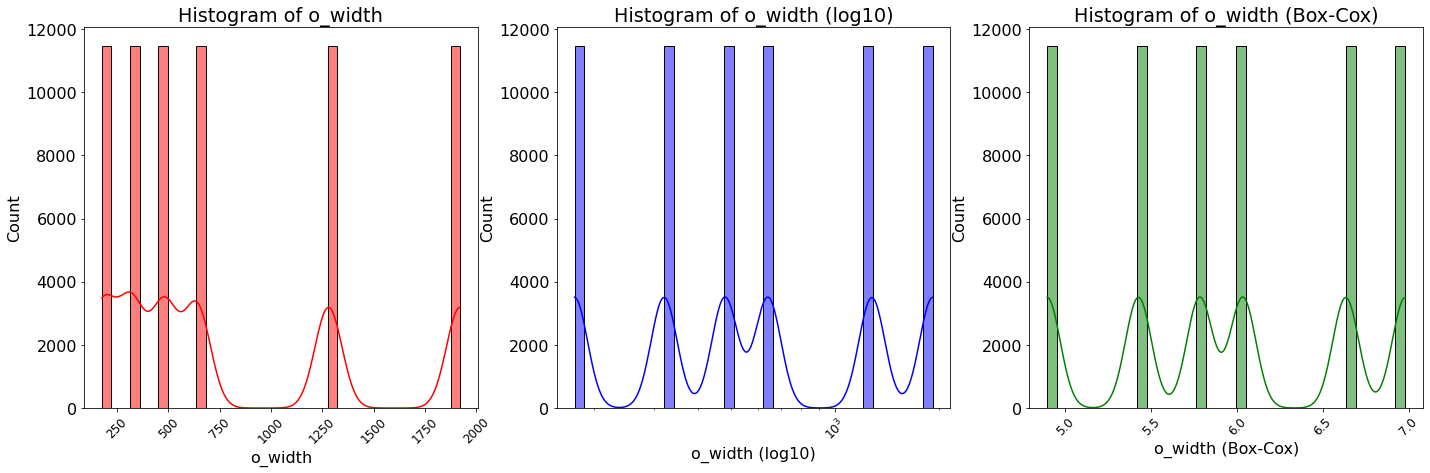

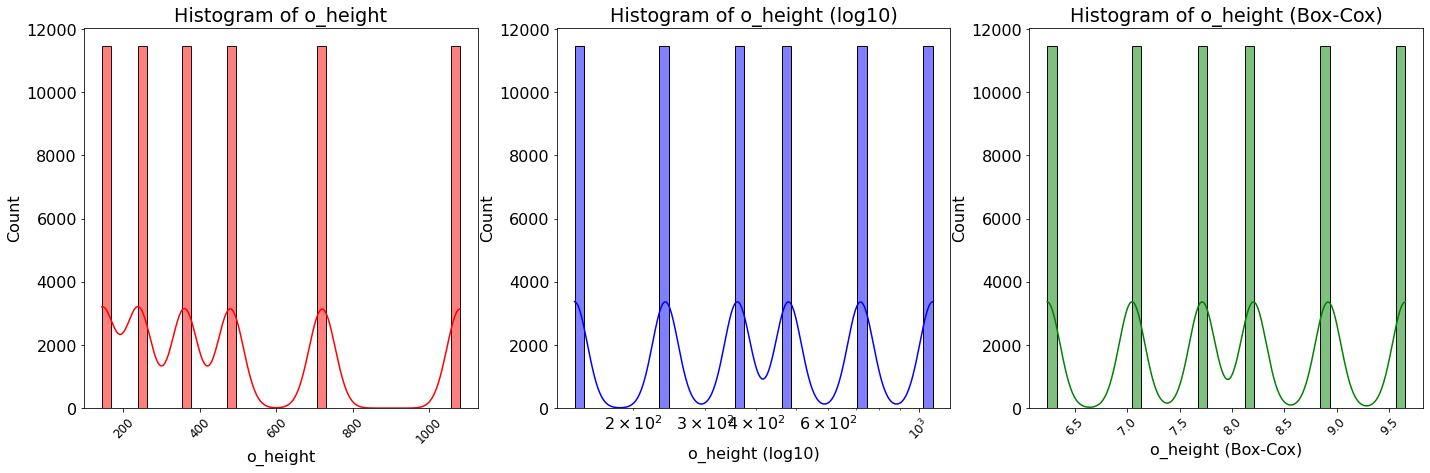

In [41]:
threeplots(df['o_width'])
threeplots(df['o_height'])

Text(0.5, 0, 'o_height (output pixels)')

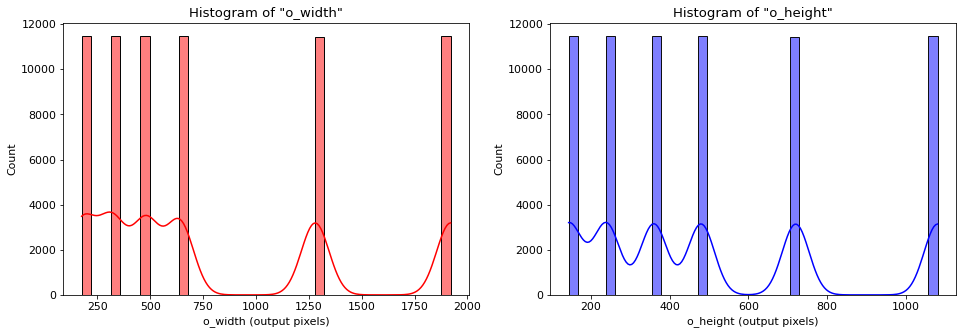

In [21]:
f = plt.figure(figsize=(16,5))
ax = f.add_subplot(121)
sns.histplot(data=df, x='o_width', kde=True, color='red')
ax.set_title('Histogram of "o_width"')
ax.set_xlabel('o_width (output pixels)')

ax = f.add_subplot(122)
sns.histplot(data=df, x='o_height', kde=True, color='blue')
ax.set_title('Histogram of "o_height"')
ax.set_xlabel('o_height (output pixels)')

The histograms of “o_width” and “o_height”, which represent the output width and height in pixels, are similar to those of “width” and “height”. While “o_width” and “o_height” are more evenly distributed than “width” and “height”, they also appear to fall into 6 categories and to be highly correlated. We will treat “o_width” and “o_height” similar to how we treated “width” and “height”.

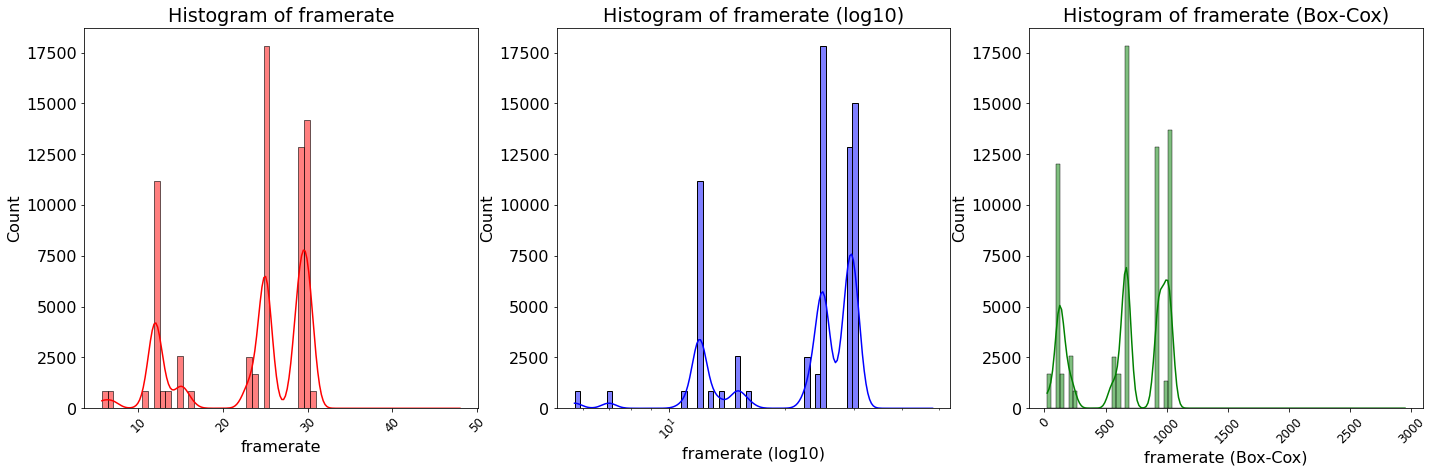

In [42]:
threeplots(df['framerate'])

The feature “framerate” appears to be somewhat normally distributed with perhaps 3 areas where there are modes or larger peaks.

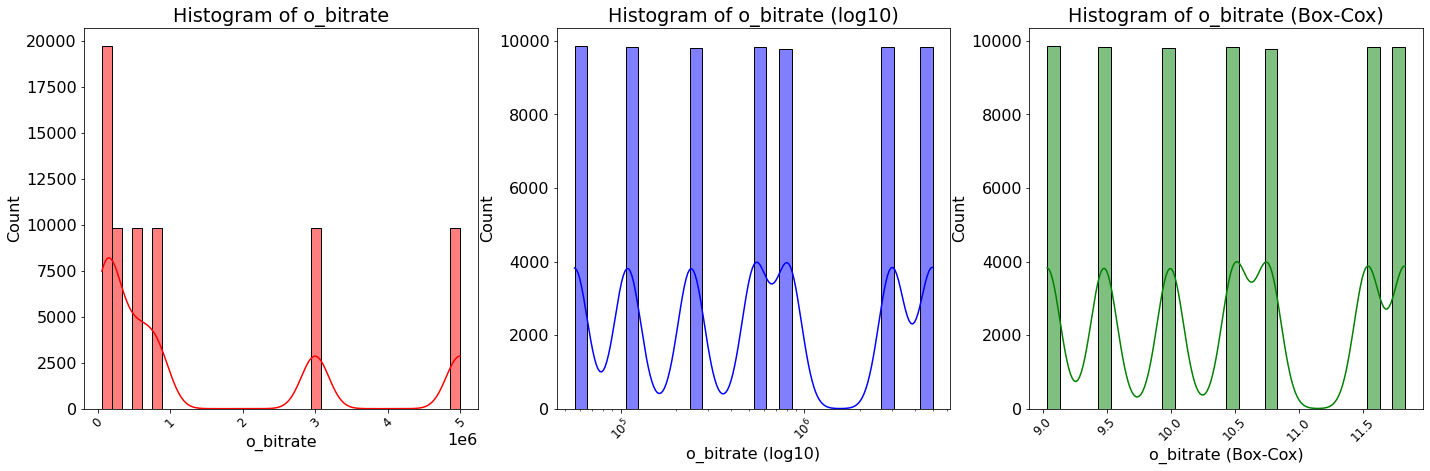

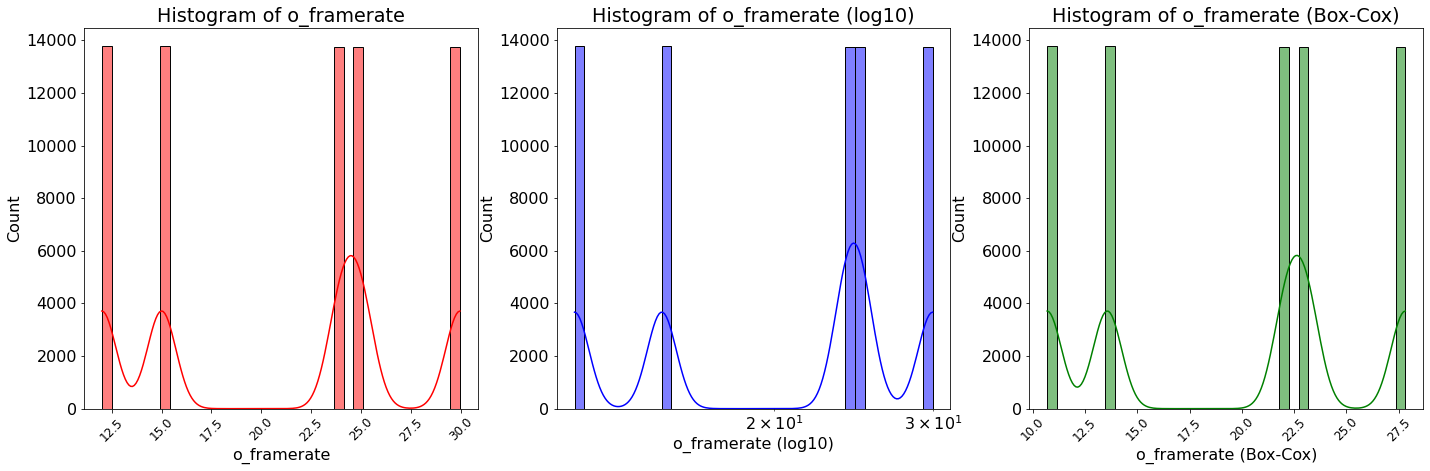

In [43]:
threeplots(df['o_bitrate'])
threeplots(df['o_framerate'])

The histogram for “o_bitrate”, which represents the output bitrate used for transcoding, shows that the data points fall into one of a few different categories. Similarly, the histogram for “o_framerate”, which represents the output framerate used for transcoding, shows that these data points also fall into one of a few different categories. We will still consider these 2 features as numerical features though.

In [ ]:
# Numerical features (17): duration, height, width, bitrate, framerate, i, p, b, frames,
#                          i_size, p_size, b_size (skipped), size, o_bitrate, o_framerate, o_width, o_height

In [45]:
#Check for Normality of each dataset, its log transform and Box-Cox transform using Shapiro-Wilk Test:
from scipy.stats import shapiro

def chnorm(dsets):
    for i in dsets:
        stat, p = shapiro(i)
        print(i.name, 'Raw data stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')
        
        #repeat test for log10 transformation
        stat, p = shapiro(np.log10(i))
        print(i.name, 'log10 transformation stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')        
   
        #repeat test for Box-Cox transformation
        data_bc, lam, ci= boxcox(i, alpha=.05)
        stat, p = shapiro(data_bc)
        print(i.name, 'Box-Cox transformation stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')

In [46]:
# Numerical features (17): duration, height, width, bitrate, framerate, i, p, b, frames,
#                          i_size, p_size, b_size (skipped), size, o_bitrate, o_framerate, o_width, o_height
b = df['b']
b.replace(to_replace=0,value=0.01,inplace=True)
ncolumns = [df['duration'], df['height'], df['width'], df['bitrate'], df['framerate'], 
            df['i'], df['p'], b, df['frames'], df['i_size'], df['p_size'],
            df['size'], df['o_bitrate'], df['o_framerate'], df['o_width'], df['o_height']]

chnorm(ncolumns)

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


duration Raw data stat=0.661, p=0.000
Probably NOT Gaussian Distribution

duration log10 transformation stat=0.976, p=0.000
Probably NOT Gaussian Distribution

duration Box-Cox transformation stat=0.979, p=0.000
Probably NOT Gaussian Distribution

height Raw data stat=0.858, p=0.000
Probably NOT Gaussian Distribution

height log10 transformation stat=0.926, p=0.000
Probably NOT Gaussian Distribution

height Box-Cox transformation stat=0.926, p=0.000
Probably NOT Gaussian Distribution

width Raw data stat=0.791, p=0.000
Probably NOT Gaussian Distribution

width log10 transformation stat=0.916, p=0.000
Probably NOT Gaussian Distribution

width Box-Cox transformation stat=0.918, p=0.000
Probably NOT Gaussian Distribution

bitrate Raw data stat=0.578, p=0.000
Probably NOT Gaussian Distribution

bitrate log10 transformation stat=0.966, p=0.000
Probably NOT Gaussian Distribution

bitrate Box-Cox transformation stat=0.966, p=0.000
Probably NOT Gaussian Distribution

framerate Raw data stat=0.

In [3]:
# Numerical features (17): duration, height, width, bitrate, framerate, i, p, b, frames,
#                          i_size, p_size, b_size (skipped), size, o_bitrate, o_framerate, o_width, o_height
# Remove b-size (all 0's)
# For b, we will not apply Box-Cox transformation because it does not significantly
#     improve the normality of the distribution and we have to somewhat doctor the original data
# For the rest of the numerical features, we will apply Box-Cox transformation to improve
#     the normality of the distributions.
df_all=df.copy()

duration_bc, dlam, dci= boxcox(df['duration'], alpha=.05)
height_bc, hlam, hci= boxcox(df['height'], alpha=.05)
width_bc, wlam, wci= boxcox(df['width'], alpha=.05)
bitrate_bc, brlam, brci= boxcox(df['bitrate'], alpha=.05)
framerate_bc, frlam, frci= boxcox(df['framerate'], alpha=.05)
i_bc, ilam, ici= boxcox(df['i'], alpha=.05)
p_bc, plam, pci= boxcox(df['p'], alpha=.05)
# no Box-Cox for b
frames_bc, flam, fci= boxcox(df['frames'], alpha=.05)
i_size_bc, islam, isci= boxcox(df['i_size'], alpha=.05)
p_size_bc, pslam, psci= boxcox(df['p_size'], alpha=.05)
# b_size removed
size_bc, slam, sci= boxcox(df['size'], alpha=.05)
o_bitrate_bc, obrlam, obrci= boxcox(df['o_bitrate'], alpha=.05)
o_framerate_bc, ofrlam, ofrci= boxcox(df['o_framerate'], alpha=.05)
o_width_bc, owlam, owci= boxcox(df['o_width'], alpha=.05)
o_height_bc, ohlam, ohci= boxcox(df['o_height'], alpha=.05)

df_all['duration_bc'] = duration_bc
df_all['height_bc'] = height_bc
df_all['width_bc'] = width_bc
df_all['bitrate_bc'] = bitrate_bc
df_all['framerate_bc'] = framerate_bc
df_all['i_bc'] = i_bc
df_all['p_bc'] = p_bc
df_all['frames_bc'] = frames_bc
df_all['i_size_bc'] = i_size_bc
df_all['p_size_bc'] = p_size_bc
df_all['size_bc'] = size_bc
df_all['o_bitrate_bc'] = o_bitrate_bc
df_all['o_framerate_bc'] = o_framerate_bc
df_all['o_width_bc'] = o_width_bc
df_all['o_height_bc'] = o_height_bc

df_all.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime,duration_bc,height_bc,width_bc,bitrate_bc,framerate_bc,i_bc,p_bc,frames_bc,i_size_bc,p_size_bc,size_bc,o_bitrate_bc,o_framerate_bc,o_width_bc,o_height_bc
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355,6.668221,5.543066,3.932910,8.744770,643.209413,5.936679,19.652077,19.695784,23.991237,11.008659,12.128445,10.447882,19.463006,5.958910,7.961062
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429,1.350711,0.515236,0.257458,0.582000,343.975104,1.532836,4.321948,4.307851,4.356879,0.766847,0.881614,0.951861,6.350871,0.701472,1.133411
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000,3.965791,4.742962,3.530126,6.921400,22.709052,2.232866,8.468245,8.692422,13.399957,8.233707,9.898174,9.035497,10.698287,4.895015,6.236224
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000,5.683408,5.205632,3.781646,8.379332,208.574450,4.770287,16.785912,16.826673,21.304264,10.460719,11.438187,9.479175,13.573876,5.426896,7.045910
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000,6.902794,5.569698,3.939172,8.743216,669.582276,6.023923,20.411547,20.463208,23.608960,11.051901,12.169388,10.501512,22.150120,5.783780,7.715055
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000,7.637232,5.826315,4.044961,9.105051,937.063586,7.061960,22.868314,22.860127,27.237522,11.472336,12.687372,11.535829,23.099359,6.634407,8.915832
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000,15.809743,6.542195,4.407377,10.101335,2952.026874,16.359129,47.541209,47.544330,38.279628,13.112576,14.613853,11.831455,27.808355,6.980871,9.653009


# Question 3

(0.0, 20.0)

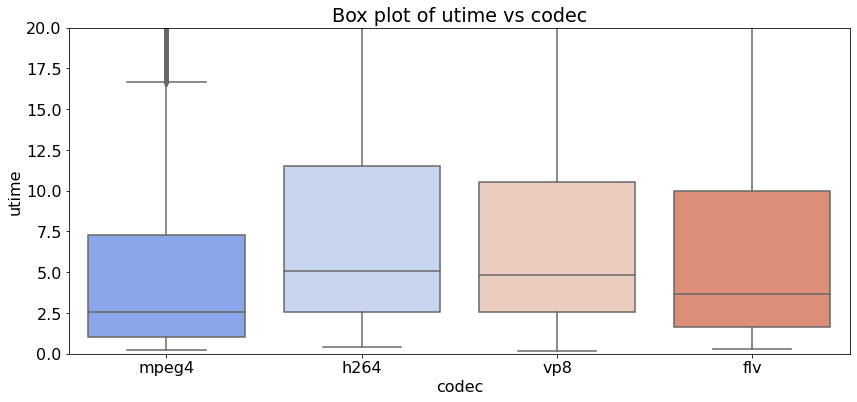

In [62]:
# Question 3: Box plots of categorical features
# Categorical features: codec, o_codec
plt.figure(figsize=(14,6))
sns.boxplot(x='codec', y='utime', data=df, palette='coolwarm')
plt.title('Box plot of utime vs codec')
plt.ylim(0, 20)

(0.0, 30.0)

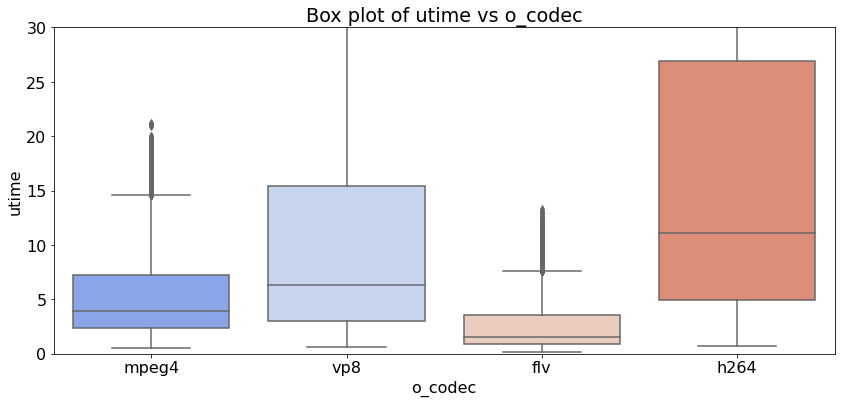

In [68]:
plt.figure(figsize=(14,6))
sns.boxplot(x='o_codec', y='utime', data=df, palette='coolwarm')
plt.title('Box plot of utime vs o_codec')
plt.ylim(0, 30)

# Question 6

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

count    68784.000000
mean         9.996355
std         16.107429
min          0.184000
25%          2.096000
50%          4.408000
75%         10.433000
max        224.574000
Name: utime, dtype: float64
utime Raw data stat=0.552, p=0.000
Probably NOT Gaussian Distribution

utime log10 transformation stat=0.995, p=0.000
Probably NOT Gaussian Distribution

utime Box-Cox transformation stat=0.998, p=0.000
Probably NOT Gaussian Distribution



/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


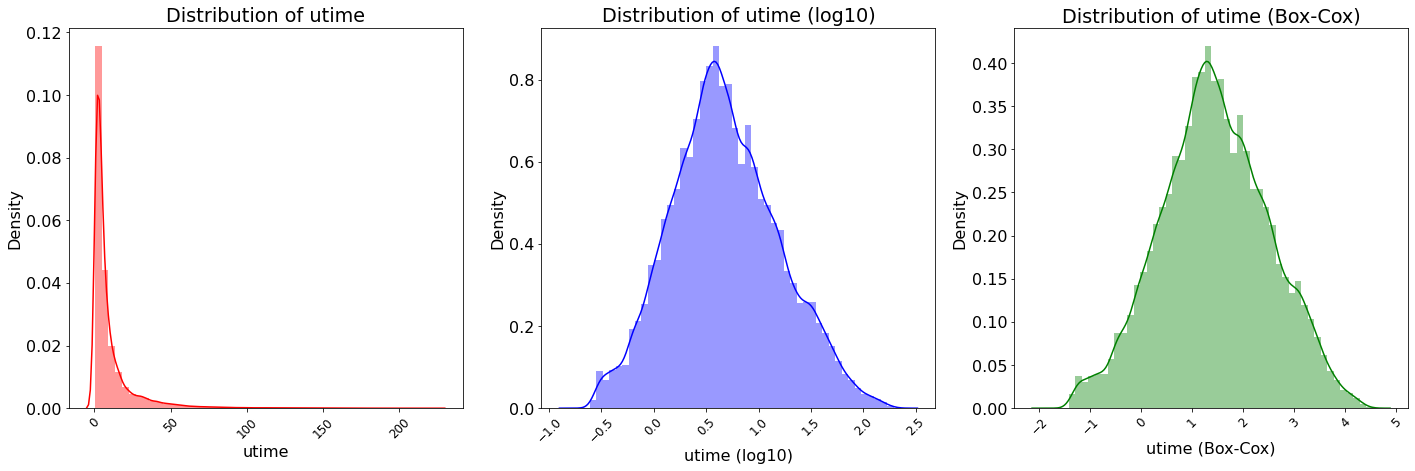

In [71]:
# Question 6: Distribution of video transcoding times.
data=df['utime']

f=plt.figure(figsize=(24,7))
ax1=f.add_subplot(131)
sns.distplot(data, kde=True, color='r',ax=ax1)
ax1.set_title('Distribution of %s' % data.name)
plt.xticks(rotation=45, fontsize=12)

ax2=f.add_subplot(132)
sns.distplot(np.log10(data), kde=True, color='b', ax=ax2)
ax2.set_title('Distribution of %s (log10)' % data.name)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('%s (log10)' % data.name)

data_bc, lam, ci= boxcox(data, alpha=.05)
ax3=f.add_subplot(133)
sns.distplot(data_bc, kde=True, color='g', ax=ax3)
ax3.set_title('Distribution of %s (Box-Cox)' % data.name)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('%s (Box-Cox)' % data.name)

#threeplots(df['utime'])
print(df['utime'].describe())
chnorm([df['utime']])

# Question 7

In [4]:
# Question 7: Encoding Categorical Features
df_all2 = df_all.copy()

In [5]:
# Dummy variable
categorical_columns = ['codec','o_codec']
df_encode = pd.get_dummies(data = df_all, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [6]:
# Lets verify the dummy variable process
print('Columns in original data frame:\n',df_all.columns.values)
print('\nNumber of rows and columns in the dataset:',df_all.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
df_encode.info()
df_encode.head()

Columns in original data frame:
 ['id' 'duration' 'codec' 'width' 'height' 'bitrate' 'framerate' 'i' 'p'
 'b' 'frames' 'i_size' 'p_size' 'b_size' 'size' 'o_codec' 'o_bitrate'
 'o_framerate' 'o_width' 'o_height' 'umem' 'utime' 'duration_bc'
 'height_bc' 'width_bc' 'bitrate_bc' 'framerate_bc' 'i_bc' 'p_bc'
 'frames_bc' 'i_size_bc' 'p_size_bc' 'size_bc' 'o_bitrate_bc'
 'o_framerate_bc' 'o_width_bc' 'o_height_bc']

Number of rows and columns in the dataset: (68784, 37)

Columns in data frame after encoding dummy variable:
 ['id' 'duration' 'width' 'height' 'bitrate' 'framerate' 'i' 'p' 'b'
 'frames' 'i_size' 'p_size' 'b_size' 'size' 'o_bitrate' 'o_framerate'
 'o_width' 'o_height' 'umem' 'utime' 'duration_bc' 'height_bc' 'width_bc'
 'bitrate_bc' 'framerate_bc' 'i_bc' 'p_bc' 'frames_bc' 'i_size_bc'
 'p_size_bc' 'size_bc' 'o_bitrate_bc' 'o_framerate_bc' 'o_width_bc'
 'o_height_bc' 'codec_h264' 'codec_mpeg4' 'codec_vp8' 'o_codec_h264'
 'o_codec_mpeg4' 'o_codec_vp8']

Number of rows and columns

,id,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime,duration_bc,height_bc,width_bc,bitrate_bc,framerate_bc,i_bc,p_bc,frames_bc,i_size_bc,p_size_bc,size_bc,o_bitrate_bc,o_framerate_bc,o_width_bc,o_height_bc,codec_h264,codec_mpeg4,codec_vp8,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,176,144,22508,0.612,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,4.895015,6.236224,0,1,0,0,1,0
1,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,320,240,25164,0.980,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,5.426896,7.045910,0,1,0,0,1,0
2,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,480,360,29228,1.216,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,5.783780,7.715055,0,1,0,0,1,0
3,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,640,480,34316,1.692,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,6.035124,8.204533,0,1,0,0,1,0
4,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,1280,720,58528,3.456,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,6.634407,8.915832,0,1,0,0,1,0


# Question 8

In [81]:
# Standardize

In [82]:
# May need to change b values that originally = 0 back to 0
# Earlier we may have temporarily edited these zero values to = 0.01
df_encode['b'].replace(to_replace=0.01,value=0,inplace=True)
df_encode.head()

,id,duration,width,height,bitrate,framerate,i,p,b,frames,...,o_bitrate_bc,o_framerate_bc,o_width_bc,o_height_bc,codec_h264,codec_mpeg4,codec_vp8,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0.0,1564,...,9.035497,10.698287,4.895015,6.236224,0,1,0,0,1,0
1,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0.0,1564,...,9.035497,10.698287,5.426896,7.045910,0,1,0,0,1,0
2,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0.0,1564,...,9.035497,10.698287,5.783780,7.715055,0,1,0,0,1,0
3,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0.0,1564,...,9.035497,10.698287,6.035124,8.204533,0,1,0,0,1,0
4,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0.0,1564,...,9.035497,10.698287,6.634407,8.915832,0,1,0,0,1,0


In [7]:
# Box-Cox transformation on target variable utime
utime_bc, ulam, uci= boxcox(df['utime'], alpha=.05)
df_encode['utime_bc'] = utime_bc
df_encode.info()
df_encode.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              68784 non-null  object 
 1   duration        68784 non-null  float64
 2   width           68784 non-null  int64  
 3   height          68784 non-null  int64  
 4   bitrate         68784 non-null  int64  
 5   framerate       68784 non-null  float64
 6   i               68784 non-null  int64  
 7   p               68784 non-null  int64  
 8   b               68784 non-null  int64  
 9   frames          68784 non-null  int64  
 10  i_size          68784 non-null  int64  
 11  p_size          68784 non-null  int64  
 12  b_size          68784 non-null  int64  
 13  size            68784 non-null  int64  
 14  o_bitrate       68784 non-null  int64  
 15  o_framerate     68784 non-null  float64
 16  o_width         68784 non-null  int64  
 17  o_height        68784 non-null 

,id,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime,duration_bc,height_bc,width_bc,bitrate_bc,framerate_bc,i_bc,p_bc,frames_bc,i_size_bc,p_size_bc,size_bc,o_bitrate_bc,o_framerate_bc,o_width_bc,o_height_bc,codec_h264,codec_mpeg4,codec_vp8,o_codec_h264,o_codec_mpeg4,o_codec_vp8,utime_bc
0,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,176,144,22508,0.612,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,4.895015,6.236224,0,1,0,0,1,0,-0.499235
1,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,320,240,25164,0.980,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,5.426896,7.045910,0,1,0,0,1,0,-0.020216
2,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,480,360,29228,1.216,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,5.783780,7.715055,0,1,0,0,1,0,0.194284
3,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,640,480,34316,1.692,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,6.035124,8.204533,0,1,0,0,1,0,0.516703
4,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,1280,720,58528,3.456,5.977868,4.742962,3.530126,7.933197,125.323536,4.175254,15.117981,15.156301,16.991754,10.044206,10.871888,9.035497,10.698287,6.634407,8.915832,0,1,0,0,1,0,1.189721


In [8]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler

In [9]:
df_encode2 = df_encode.copy()

In [10]:
# numerical columns to be Standardized
ft0=['duration_bc', 'height_bc', 'width_bc', 'bitrate_bc', 'framerate_bc',
     'i_bc', 'p_bc', 'b', 'frames_bc', 'i_size_bc', 'p_size_bc', 'size_bc',
     'o_bitrate_bc', 'o_framerate_bc', 'o_width_bc', 'o_height_bc', 'utime_bc']  

preprocess = make_column_transformer(
    (StandardScaler(),ft0),
    remainder='passthrough')

ft_res = preprocess.fit_transform(df_encode[ft0])

In [121]:
print(type(ft_res))
print(ft_res.shape)
ft_res[:10]

<class 'numpy.ndarray'>
(68784, 17)


array([[-0.51110739, -1.55289939, -1.56447587, -1.39446364, -1.50560211,
        -1.14913675, -1.04909398, -0.09887915, -1.05377746, -1.6065475 ,
        -1.25769603, -1.42530154, -1.48382558, -1.38009157, -1.51667279,
        -1.52182293, -1.82289216],
       [-0.51110739, -1.55289939, -1.56447587, -1.39446364, -1.50560211,
        -1.14913675, -1.04909398, -0.09887915, -1.05377746, -1.6065475 ,
        -1.25769603, -1.42530154, -1.48382558, -1.38009157, -0.75843144,
        -0.80743793, -1.37346768],
       [-0.51110739, -1.55289939, -1.56447587, -1.39446364, -1.50560211,
        -1.14913675, -1.04909398, -0.09887915, -1.05377746, -1.6065475 ,
        -1.25769603, -1.42530154, -1.48382558, -1.38009157, -0.24966336,
        -0.21705186, -1.17221912],
       [-0.51110739, -1.55289939, -1.56447587, -1.39446364, -1.50560211,
        -1.14913675, -1.04909398, -0.09887915, -1.05377746, -1.6065475 ,
        -1.25769603, -1.42530154, -1.48382558, -1.38009157,  0.10864862,
         0.21481492

In [11]:
#Creating a df with standardized features
std_ft_df = pd.DataFrame(ft_res, 
                         columns=['duration_bc_std', 'height_bc_std', 'width_bc_std', 'bitrate_bc_std', 'framerate_bc_std',
                                  'i_bc_std', 'p_bc_std', 'b_std', 'frames_bc_std', 'i_size_bc_std', 'p_size_bc_std', 'size_bc_std',
                                  'o_bitrate_bc_std', 'o_framerate_bc_std', 'o_width_bc_std', 'o_height_bc_std', 'utime_bc_std'])
std_ft_df.info()
std_ft_df[:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_bc_std     68784 non-null  float64
 1   height_bc_std       68784 non-null  float64
 2   width_bc_std        68784 non-null  float64
 3   bitrate_bc_std      68784 non-null  float64
 4   framerate_bc_std    68784 non-null  float64
 5   i_bc_std            68784 non-null  float64
 6   p_bc_std            68784 non-null  float64
 7   b_std               68784 non-null  float64
 8   frames_bc_std       68784 non-null  float64
 9   i_size_bc_std       68784 non-null  float64
 10  p_size_bc_std       68784 non-null  float64
 11  size_bc_std         68784 non-null  float64
 12  o_bitrate_bc_std    68784 non-null  float64
 13  o_framerate_bc_std  68784 non-null  float64
 14  o_width_bc_std      68784 non-null  float64
 15  o_height_bc_std     68784 non-null  float64
 16  utim

,duration_bc_std,height_bc_std,width_bc_std,bitrate_bc_std,framerate_bc_std,i_bc_std,p_bc_std,b_std,frames_bc_std,i_size_bc_std,p_size_bc_std,size_bc_std,o_bitrate_bc_std,o_framerate_bc_std,o_width_bc_std,o_height_bc_std,utime_bc_std
0,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-1.516673,-1.521823,-1.822892
1,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-0.758431,-0.807438,-1.373468
2,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-0.249663,-0.217052,-1.172219
3,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,0.108649,0.214815,-0.869719
4,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,0.962977,0.842393,-0.238281
5,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,1.456891,1.492804,0.272193
6,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-1.516673,-1.521823,-1.655550
7,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-0.758431,-0.807438,-1.408674
8,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-0.249663,-0.217052,-0.993967
9,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,0.108649,0.214815,-0.735401


In [12]:
#combining standardized features with One-Hot features and Target in df
df_temp=df_encode.iloc[:,35:]
df_temp['utime']=df_encode['utime']
df_temp['utime_bc']=df_encode['utime_bc']
std_ft_df = pd.concat([std_ft_df, df_temp], axis=1)
std_ft_df.info()
std_ft_df[:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_bc_std     68784 non-null  float64
 1   height_bc_std       68784 non-null  float64
 2   width_bc_std        68784 non-null  float64
 3   bitrate_bc_std      68784 non-null  float64
 4   framerate_bc_std    68784 non-null  float64
 5   i_bc_std            68784 non-null  float64
 6   p_bc_std            68784 non-null  float64
 7   b_std               68784 non-null  float64
 8   frames_bc_std       68784 non-null  float64
 9   i_size_bc_std       68784 non-null  float64
 10  p_size_bc_std       68784 non-null  float64
 11  size_bc_std         68784 non-null  float64
 12  o_bitrate_bc_std    68784 non-null  float64
 13  o_framerate_bc_std  68784 non-null  float64
 14  o_width_bc_std      68784 non-null  float64
 15  o_height_bc_std     68784 non-null  float64
 16  utim

,duration_bc_std,height_bc_std,width_bc_std,bitrate_bc_std,framerate_bc_std,i_bc_std,p_bc_std,b_std,frames_bc_std,i_size_bc_std,p_size_bc_std,size_bc_std,o_bitrate_bc_std,o_framerate_bc_std,o_width_bc_std,o_height_bc_std,utime_bc_std,codec_h264,codec_mpeg4,codec_vp8,o_codec_h264,o_codec_mpeg4,o_codec_vp8,utime_bc,utime
0,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-1.516673,-1.521823,-1.822892,0,1,0,0,1,0,-0.499235,0.612
1,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-0.758431,-0.807438,-1.373468,0,1,0,0,1,0,-0.020216,0.980
2,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-0.249663,-0.217052,-1.172219,0,1,0,0,1,0,0.194284,1.216
3,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,0.108649,0.214815,-0.869719,0,1,0,0,1,0,0.516703,1.692
4,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,0.962977,0.842393,-0.238281,0,1,0,0,1,0,1.189721,3.456
5,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,1.456891,1.492804,0.272193,0,1,0,0,1,0,1.733809,6.320
6,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-1.516673,-1.521823,-1.655550,0,1,0,0,1,0,-0.320873,0.728
7,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-0.758431,-0.807438,-1.408674,0,1,0,0,1,0,-0.057741,0.944
8,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-0.249663,-0.217052,-0.993967,0,1,0,0,1,0,0.384274,1.476
9,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,0.108649,0.214815,-0.735401,0,1,0,0,1,0,0.659866,1.964


In [13]:
columns=['duration_bc_std', 'height_bc_std', 'width_bc_std', 'bitrate_bc_std', 'framerate_bc_std',
         'i_bc_std', 'p_bc_std', 'b_std', 'frames_bc_std', 'i_size_bc_std', 'p_size_bc_std', 'size_bc_std',
         'o_bitrate_bc_std', 'o_framerate_bc_std', 'o_width_bc_std', 'o_height_bc_std',
         'codec_h264', 'codec_mpeg4', 'codec_vp8', 'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8',
         'utime', 'utime_bc', 'utime_bc_std']

df_final = std_ft_df[columns]
df_final.info()
df_final[:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_bc_std     68784 non-null  float64
 1   height_bc_std       68784 non-null  float64
 2   width_bc_std        68784 non-null  float64
 3   bitrate_bc_std      68784 non-null  float64
 4   framerate_bc_std    68784 non-null  float64
 5   i_bc_std            68784 non-null  float64
 6   p_bc_std            68784 non-null  float64
 7   b_std               68784 non-null  float64
 8   frames_bc_std       68784 non-null  float64
 9   i_size_bc_std       68784 non-null  float64
 10  p_size_bc_std       68784 non-null  float64
 11  size_bc_std         68784 non-null  float64
 12  o_bitrate_bc_std    68784 non-null  float64
 13  o_framerate_bc_std  68784 non-null  float64
 14  o_width_bc_std      68784 non-null  float64
 15  o_height_bc_std     68784 non-null  float64
 16  code

,duration_bc_std,height_bc_std,width_bc_std,bitrate_bc_std,framerate_bc_std,i_bc_std,p_bc_std,b_std,frames_bc_std,i_size_bc_std,p_size_bc_std,size_bc_std,o_bitrate_bc_std,o_framerate_bc_std,o_width_bc_std,o_height_bc_std,codec_h264,codec_mpeg4,codec_vp8,o_codec_h264,o_codec_mpeg4,o_codec_vp8,utime,utime_bc,utime_bc_std
0,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-1.516673,-1.521823,0,1,0,0,1,0,0.612,-0.499235,-1.822892
1,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-0.758431,-0.807438,0,1,0,0,1,0,0.980,-0.020216,-1.373468
2,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,-0.249663,-0.217052,0,1,0,0,1,0,1.216,0.194284,-1.172219
3,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,0.108649,0.214815,0,1,0,0,1,0,1.692,0.516703,-0.869719
4,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,0.962977,0.842393,0,1,0,0,1,0,3.456,1.189721,-0.238281
5,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-1.380092,1.456891,1.492804,0,1,0,0,1,0,6.320,1.733809,0.272193
6,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-1.516673,-1.521823,0,1,0,0,1,0,0.728,-0.320873,-1.655550
7,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-0.758431,-0.807438,0,1,0,0,1,0,0.944,-0.057741,-1.408674
8,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,-0.249663,-0.217052,0,1,0,0,1,0,1.476,0.384274,-0.993967
9,-0.511107,-1.552899,-1.564476,-1.394464,-1.505602,-1.149137,-1.049094,-0.098879,-1.053777,-1.606547,-1.257696,-1.425302,-1.483826,-0.927302,0.108649,0.214815,0,1,0,0,1,0,1.964,0.659866,-0.735401


In [125]:
df_final.describe()

,duration_bc_std,height_bc_std,width_bc_std,bitrate_bc_std,framerate_bc_std,i_bc_std,p_bc_std,b_std,frames_bc_std,i_size_bc_std,p_size_bc_std,size_bc_std,o_bitrate_bc_std,o_framerate_bc_std,o_width_bc_std,o_height_bc_std,codec_h264,codec_mpeg4,codec_vp8,o_codec_h264,o_codec_mpeg4,o_codec_vp8,utime,utime_bc,utime_bc_std
count,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04
mean,-6.677350e-16,-2.644495e-17,2.776720e-16,1.401582e-15,2.644495e-17,4.627866e-16,-6.115395e-16,-5.371630e-18,1.685866e-16,8.594609e-17,1.338776e-15,-2.776720e-16,-3.226749e-15,2.850063e-16,5.578232e-18,1.297455e-16,0.458610,0.174634,0.267315,0.248328,0.251381,0.251178,9.996355,1.443692,-9.916856e-18
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.498288,0.379656,0.442561,0.432046,0.433810,0.433694,16.107429,1.065857,1.000007e+00
min,-2.000761e+00,-1.552899e+00,-1.564476e+00,-3.132958e+00,-1.803924e+00,-2.416332e+00,-2.587702e+00,-9.887915e-02,-2.554276e+00,-2.430950e+00,-3.618678e+00,-2.529776e+00,-1.483826e+00,-1.380092e+00,-1.516673e+00,-1.521823e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184000,-1.793127,-3.036847e+00
25%,-7.291130e-01,-6.549175e-01,-5.875324e-01,-6.279033e-01,-1.263574e+00,-7.609426e-01,-6.631700e-01,-9.887915e-02,-6.660239e-01,-6.167240e-01,-7.145418e-01,-7.829537e-01,-1.017706e+00,-9.273017e-01,-7.584314e-01,-8.074379e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.096000,0.721886,-6.772130e-01
50%,1.736671e-01,5.168826e-02,2.432496e-02,-2.668916e-03,7.667140e-02,5.691699e-02,1.757252e-01,-9.887915e-02,1.781468e-01,-8.774166e-02,5.638953e-02,4.644104e-02,5.634189e-02,4.231125e-01,-2.496634e-01,-2.170519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.408000,1.411704,-3.001258e-02
75%,7.174129e-01,5.497505e-01,4.352248e-01,6.190438e-01,8.542953e-01,7.341218e-01,7.441691e-01,-9.887915e-02,7.345579e-01,7.450996e-01,6.046581e-01,6.339864e-01,1.142977e+00,5.725796e-01,9.629771e-01,8.423931e-01,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.433000,2.169121,6.806115e-01
max,6.767982e+00,1.939182e+00,1.842907e+00,2.330883e+00,6.712213e+00,6.799503e+00,6.452955e+00,1.015814e+02,6.464650e+00,3.279525e+00,2.743614e+00,2.819176e+00,1.453555e+00,1.314057e+00,1.456891e+00,1.492804e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,224.574000,4.536624,2.901848e+00


# Question 9

In [14]:
df_final_2 = df_final.copy()

In [16]:
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.model_selection import train_test_split

In [17]:
X = df_final.iloc[:,:22] # Independent variables (features)
y = df_final['utime_bc_std'] # Dependent variable (target variable)
X.info()
y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_bc_std     68784 non-null  float64
 1   height_bc_std       68784 non-null  float64
 2   width_bc_std        68784 non-null  float64
 3   bitrate_bc_std      68784 non-null  float64
 4   framerate_bc_std    68784 non-null  float64
 5   i_bc_std            68784 non-null  float64
 6   p_bc_std            68784 non-null  float64
 7   b_std               68784 non-null  float64
 8   frames_bc_std       68784 non-null  float64
 9   i_size_bc_std       68784 non-null  float64
 10  p_size_bc_std       68784 non-null  float64
 11  size_bc_std         68784 non-null  float64
 12  o_bitrate_bc_std    68784 non-null  float64
 13  o_framerate_bc_std  68784 non-null  float64
 14  o_width_bc_std      68784 non-null  float64
 15  o_height_bc_std     68784 non-null  float64
 16  code

(68784,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [142]:
mi = mutual_info_regression(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=42)
print(mi)

[0.30711205 0.14719947 0.14601398 0.32517877 0.17166648 0.29992915
 0.32364343 0.         0.32100965 0.31905116 0.32304049 0.32325757
 0.02131671 0.0183187  0.30980908 0.3129051  0.0279522  0.04169718
 0.01054893 0.10511679 0.06792375 0.03645786]


In [141]:
f, pval = f_regression(X, y)
print(f)
print(pval)

[6.64275918e+00 6.75732518e+03 6.86144449e+03 8.25463105e+03
 2.85783241e+03 4.03381998e+02 5.68520945e+02 2.21680017e-01
 5.68155862e+02 3.73342337e+03 5.88791001e+03 5.71843942e+03
 6.69125644e+02 9.59325143e+02 4.35932886e+04 4.33565879e+04
 1.29211587e+03 3.30996162e+03 2.97620147e+02 1.44917629e+04
 3.61736017e+02 2.03362599e+03]
[9.95802458e-003 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.82744322e-089 3.80404599e-125 6.37764294e-001
 4.56048097e-125 0.00000000e+000 0.00000000e+000 0.00000000e+000
 7.83521329e-147 3.45186105e-209 0.00000000e+000 0.00000000e+000
 2.36311752e-280 0.00000000e+000 1.50183965e-066 0.00000000e+000
 1.89908104e-080 0.00000000e+000]


# Linear Regression: Question 10-13

In [151]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [152]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [153]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-0.967048,-0.967048
1,theta_1,duration_bc_std,-0.281490,-0.281490
2,theta_2,height_bc_std,-0.058942,-0.058942
3,theta_3,width_bc_std,0.201218,0.201218
4,theta_4,bitrate_bc_std,-0.210357,-0.210357
5,theta_5,framerate_bc_std,0.053074,0.053074
6,theta_6,i_bc_std,0.049727,0.049727
7,theta_7,p_bc_std,0.625950,0.625950
8,theta_8,b_std,0.025334,0.025334
9,theta_9,frames_bc_std,-0.664798,-0.664798


In [177]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('The Root Mean Square Error(RMSE) is: ',np.sqrt(J_mse))
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.11911099927993318
The Root Mean Square Error(RMSE) is:  0.34512461413224815
R square obtain for normal equation method is : 0.8811667106697822


In [159]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_test, y_pred_sk)
rmse_lr = mean_squared_error(y_test, y_pred_sk, squared=False)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('The Root Mean Square Error(RMSE) is: ',rmse_lr)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.11911099927993675
The Root Mean Square Error(RMSE) is:  0.3451246141322533
R square obtain for scikit learn library is : 0.8811667106697787


In [189]:
# GridSearch to find best values
clf_lr = GridSearchCV(lin_reg, cv=10, param_grid={}, scoring='neg_root_mean_squared_error', return_train_score=True)
clf_lr.fit(X, y)

CVres = pd.DataFrame(clf_lr.cv_results_)
CVres[['rank_test_score',
       'mean_test_score',
       'mean_train_score']]

,rank_test_score,mean_test_score,mean_train_score
0,1,-0.372859,-0.344804


### Ridge Regression

In [168]:
#Ridge Regressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from numpy import arange

ridge=Ridge(random_state=42)

params={'alpha':list(arange(1,4,.1))}

ridge_regressor=GridSearchCV(ridge,params,scoring='neg_root_mean_squared_error',cv=10) 
ridge_regressor.fit(X_train,y_train)

#Show best alpha for model:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1.0}
-0.3462930841501423


In [160]:
params={'alpha':list(arange(0.01,2,.01))}

ridge_regressor=GridSearchCV(ridge,params,scoring='neg_root_mean_squared_error',cv=10) 
ridge_regressor.fit(X_train,y_train)

#Show best alpha for model:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.41000000000000003}
-0.3462921042377812


In [161]:
# The parameters for Ridge regression model
parameter_r = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns_r = ['intersect:x_0=1'] + list(X.columns.values)
#parameter_r_df.drop([parameter_r_df.columns])
parameter_r_df = pd.DataFrame({'Parameter':parameter_r,'Columns':columns_r,'theta':theta})

In [162]:
# Ridge Learn module
ridge_r=Ridge(alpha=0.41,random_state=42)
ridge_r.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta_r = [ridge_r.intercept_]+list(ridge_r.coef_)
parameter_r_df = parameter_r_df.join(pd.Series(sk_theta_r, name='Sklearn_theta'))
parameter_r_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-0.967048,-0.966412
1,theta_1,duration_bc_std,-0.281490,-0.278681
2,theta_2,height_bc_std,-0.058942,-0.056239
3,theta_3,width_bc_std,0.201218,0.198543
4,theta_4,bitrate_bc_std,-0.210357,-0.207571
5,theta_5,framerate_bc_std,0.053074,0.053282
6,theta_6,i_bc_std,0.049727,0.045646
7,theta_7,p_bc_std,0.625950,0.424540
8,theta_8,b_std,0.025334,0.023071
9,theta_9,frames_bc_std,-0.664798,-0.460239


In [163]:
# ridge regression module
y_pred_r = ridge_r.predict(X_test)

#Evaluvation: MSE
J_mse_r = mean_squared_error(y_test, y_pred_r)
rmse_lr_r = mean_squared_error(y_test, y_pred_r, squared=False)

# R_square
R_square_r = ridge_r.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_r)
print('The Root Mean Square Error(RMSE) is: ',rmse_lr_r)
print('R square obtain for scikit learn library is :',R_square_r)

The Mean Square Error(MSE) or J(theta) is:  0.11911379145496205
The Root Mean Square Error(RMSE) is:  0.3451286592779018
R square obtain for scikit learn library is : 0.8811639250047717


In [194]:
# GridSearch to find best values
clf_lr_r = GridSearchCV(ridge_r, cv=10, param_grid={}, scoring='neg_root_mean_squared_error', return_train_score=True)
clf_lr_r.fit(X, y)

CVres_lr_r = pd.DataFrame(clf_lr_r.cv_results_)
CVres_lr_r[['rank_test_score',
       'mean_test_score',
       'mean_train_score']]

,rank_test_score,mean_test_score,mean_train_score
0,1,-0.368247,-0.34482


### Lasso Regression

In [170]:
from sklearn.linear_model import Lasso 

lasso=Lasso(max_iter=2000,random_state=42)

parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 1.5, 2, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_root_mean_squared_error',cv=10)

lasso_regressor.fit(X_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2599.0274532300646, tolerance: 4.328165949099742
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2599.728124885887, tolerance: 4.3342186714798565
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2590.1979842889723, tolerance: 4.31646566399103
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linea

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2588.769846364117, tolerance: 4.347328770722812
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2587.308429797319, tolerance: 4.322354665468421
  positive)


{'alpha': 1e-15}
-0.3463014015430081


/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2883.329254203678, tolerance: 4.809673452191696
  positive)


In [171]:
# The parameters for Lasso regression model
parameter_l = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns_l = ['intersect:x_0=1'] + list(X.columns.values)
#parameter_r_df.drop([parameter_r_df.columns])
parameter_l_df = pd.DataFrame({'Parameter':parameter_l,'Columns':columns_l,'theta':theta})

In [175]:
# Lasso Learn module
lasso_l=Lasso(alpha=1e-15,max_iter=2000,random_state=42)
lasso_l.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta_l = [lasso_l.intercept_]+list(lasso_l.coef_)
parameter_l_df = parameter_l_df.merge(pd.Series(sk_theta_l, name='Sklearn_theta'))
parameter_l_df

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2883.329254203678, tolerance: 4.809673452191696
  positive)


,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-0.967048,-0.964777
1,theta_1,duration_bc_std,-0.281490,-0.257355
2,theta_2,height_bc_std,-0.058942,-0.045246
3,theta_3,width_bc_std,0.201218,0.188499
4,theta_4,bitrate_bc_std,-0.210357,-0.184921
5,theta_5,framerate_bc_std,0.053074,0.055035
6,theta_6,i_bc_std,0.049727,0.037182
7,theta_7,p_bc_std,0.625950,0.017469
8,theta_8,b_std,0.025334,0.018584
9,theta_9,frames_bc_std,-0.664798,-0.050449


In [176]:
# lasso regression module
y_pred_l = lasso_l.predict(X_test)

#Evaluvation: MSE
J_mse_l = mean_squared_error(y_test, y_pred_l)
rmse_lr_l = mean_squared_error(y_test, y_pred_l, squared=False)

# R_square
R_square_l = lasso_l.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_l)
print('The Root Mean Square Error(RMSE) is: ',rmse_lr_l)
print('R square obtain for scikit learn library is :',R_square_l)

The Mean Square Error(MSE) or J(theta) is:  0.1191440980164909
The Root Mean Square Error(RMSE) is:  0.3451725626646633
R square obtain for scikit learn library is : 0.8811336891036666


In [195]:
# GridSearch to find best values
clf_lr_l = GridSearchCV(lasso_l, cv=10, param_grid={}, scoring='neg_root_mean_squared_error', return_train_score=True)
clf_lr_l.fit(X, y)

CVres_lr_l = pd.DataFrame(clf_lr_l.cv_results_)
CVres_lr_l[['rank_test_score',
       'mean_test_score',
       'mean_train_score']]

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3711.8929494797358, tolerance: 6.154926925573872
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3638.042179582222, tolerance: 6.205218774646997
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3828.200003768985, tolerance: 6.259721668180931
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear

,rank_test_score,mean_test_score,mean_train_score
0,1,-0.367835,-0.344855


## No Scaling

In [201]:
no_scaling_columns = ['duration_bc', 'height_bc', 'width_bc', 'bitrate_bc', 'framerate_bc',
                      'i_bc', 'p_bc', 'b', 'frames_bc', 'i_size_bc', 'p_size_bc', 'size_bc',
                      'o_bitrate_bc', 'o_framerate_bc', 'o_width_bc', 'o_height_bc',
                      'codec_h264', 'codec_mpeg4', 'codec_vp8', 'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8']

X_no_scale = df_encode[no_scaling_columns]
y_no_scale = df_encode['utime_bc']
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_no_scale,y_no_scale,test_size=0.3,random_state=23)

### Ordinary Least Squares

In [207]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg_ns = LinearRegression()
lin_reg_ns.fit(X_train_ns,y_train_ns) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg_ns.intercept_]+list(lin_reg_ns.coef_)
parameter_df = parameter_df.merge(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta


In [209]:
# sklearn regression module
y_pred_sk_ns = lin_reg_ns.predict(X_test_ns)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk_ns = mean_squared_error(y_test_ns, y_pred_sk_ns)
rmse_lr_ns = mean_squared_error(y_test_ns, y_pred_sk_ns, squared=False)

# R_square
R_square_sk_ns = lin_reg_ns.score(X_test_ns,y_test_ns)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk_ns)
print('The Root Mean Square Error(RMSE) is: ',rmse_lr_ns)
print('R square obtain for scikit learn library is :',R_square_sk_ns)

The Mean Square Error(MSE) or J(theta) is:  0.13531411161940257
The Root Mean Square Error(RMSE) is:  0.36785066483479756
R square obtain for scikit learn library is : 0.8811667106697788


In [211]:
# GridSearch to find best values
clf_lr_ns = GridSearchCV(lin_reg_ns, cv=10, param_grid={}, scoring='neg_root_mean_squared_error', return_train_score=True)
clf_lr_ns.fit(X_no_scale, y_no_scale)

CVres_lr_ns = pd.DataFrame(clf_lr_ns.cv_results_)
CVres_lr_ns[['rank_test_score',
       'mean_test_score',
       'mean_train_score']]

,rank_test_score,mean_test_score,mean_train_score
0,1,-0.397411,-0.367509


### Ridge Regression

In [215]:
ridge_ns=Ridge(random_state=42)

params={'alpha':list(arange(0.01,4,.01))}

ridge_regressor_ns=GridSearchCV(ridge_ns,params,scoring='neg_root_mean_squared_error',cv=10) 
ridge_regressor_ns.fit(X_train_ns,y_train_ns)

#Show best alpha for model:
print(ridge_regressor_ns.best_params_)
print(ridge_regressor_ns.best_score_)

{'alpha': 0.14}
-0.3690975501038448


In [216]:
# Ridge Learn module
ridge_r_ns=Ridge(alpha=0.14,random_state=42)
ridge_r_ns.fit(X_train_ns,y_train_ns) # Note: x_0 =1 is no need to add, sklearn will take care of it.
# ridge regression module
y_pred_r_ns = ridge_r_ns.predict(X_test_ns)

#Evaluvation: MSE
J_mse_r_ns = mean_squared_error(y_test_ns, y_pred_r_ns)
rmse_lr_r_ns = mean_squared_error(y_test_ns, y_pred_r_ns, squared=False)

# R_square
R_square_r_ns = ridge_r_ns.score(X_test_ns,y_test_ns)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_r_ns)
print('The Root Mean Square Error(RMSE) is: ',rmse_lr_r_ns)
print('R square obtain for scikit learn library is :',R_square_r_ns)

The Mean Square Error(MSE) or J(theta) is:  0.13531385269801077
The Root Mean Square Error(RMSE) is:  0.36785031289644265
R square obtain for scikit learn library is : 0.8811669380553804


In [217]:
# GridSearch to find best values
clf_lr_r_ns = GridSearchCV(ridge_r_ns, cv=10, param_grid={}, scoring='neg_root_mean_squared_error', return_train_score=True)
clf_lr_r_ns.fit(X_no_scale, y_no_scale)

CVres_lr_r_ns = pd.DataFrame(clf_lr_r_ns.cv_results_)
CVres_lr_r_ns[['rank_test_score',
       'mean_test_score',
       'mean_train_score']]

,rank_test_score,mean_test_score,mean_train_score
0,1,-0.396405,-0.367509


### Lasso Regression

In [218]:
lasso_ns=Lasso(max_iter=2000,random_state=42)

parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 1.5, 2, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor_ns=GridSearchCV(lasso_ns,parameters,scoring='neg_root_mean_squared_error',cv=10)

lasso_regressor_ns.fit(X_train_ns,y_train_ns)

print(lasso_regressor_ns.best_params_)
print(lasso_regressor_ns.best_score_)

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2952.582826509867, tolerance: 4.916942464459957
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2953.378813134237, tolerance: 4.923818561182302
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2942.5522520638956, tolerance: 4.9036505460414235
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linea

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2942.0607554672265, tolerance: 4.9387120759964445
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2940.3523882879026, tolerance: 4.910340650297587
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.54755926446705, tolerance: 4.916942464459957
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/lin

{'alpha': 1e-15}
-0.36910494231513274


/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3275.5592591171344, tolerance: 5.463951224464038
  positive)


In [219]:
# Lasso Learn module
lasso_l_ns=Lasso(alpha=1e-15,max_iter=2000,random_state=42)
lasso_l_ns.fit(X_train_ns,y_train_ns) # Note: x_0 =1 is no need to add, sklearn will take care of it.
# lasso regression module
y_pred_l_ns = lasso_l_ns.predict(X_test_ns)

#Evaluvation: MSE
J_mse_l_ns = mean_squared_error(y_test_ns, y_pred_l_ns)
rmse_lr_l_ns = mean_squared_error(y_test_ns, y_pred_l_ns, squared=False)

# R_square
R_square_l_ns = lasso_l_ns.score(X_test_ns,y_test_ns)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_l_ns)
print('The Root Mean Square Error(RMSE) is: ',rmse_lr_l_ns)
print('R square obtain for scikit learn library is :',R_square_l_ns)

The Mean Square Error(MSE) or J(theta) is:  0.1353517129002215
The Root Mean Square Error(RMSE) is:  0.36790177072178043
R square obtain for scikit learn library is : 0.8811336891036667


/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3275.5592591171344, tolerance: 5.463951224464038
  positive)


In [220]:
# GridSearch to find best values
clf_lr_l_ns = GridSearchCV(lasso_l_ns, cv=10, param_grid={}, scoring='neg_root_mean_squared_error', return_train_score=True)
clf_lr_l_ns.fit(X_no_scale, y_no_scale)

CVres_lr_l_ns = pd.DataFrame(clf_lr_l_ns.cv_results_)
CVres_lr_l_ns[['rank_test_score',
       'mean_test_score',
       'mean_train_score']]

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4216.835556237126, tolerance: 6.992204532337058
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4132.938591477463, tolerance: 7.049337768731403
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4348.9642919139005, tolerance: 7.111254893630154
  positive)
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/linear

,rank_test_score,mean_test_score,mean_train_score
0,1,-0.392057,-0.367563


# Polynomial Regression: Question 14-16

# Neural Network: Question 17-20

In [225]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(10,),
                     activation='relu', solver='adam', max_iter=200, 
                     alpha=1e-4, random_state=42, verbose=False)

scores = cross_validate(nn, X, y, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
scores

{'fit_time': array([3.94054508, 3.96976829, 4.90589309, 4.38751483, 5.68774486,
        4.33999801, 4.28098202, 4.85014987, 4.21522689, 3.22069716]),
 'score_time': array([0.00336099, 0.00436378, 0.0044198 , 0.00365305, 0.00328612,
        0.00334001, 0.00323486, 0.00371695, 0.003299  , 0.00324678]),
 'test_score': array([-0.22985783, -0.15195477, -0.15378829, -0.26640167, -0.19374694,
        -0.15202665, -0.19197062, -0.24469952, -0.316205  , -0.36196731]),
 'train_score': array([-0.14903528, -0.14939308, -0.14638549, -0.14437253, -0.14372845,
        -0.14870197, -0.14988145, -0.14439586, -0.14165646, -0.14125937])}

In [226]:
# GridSearch to find best values
parameters = {'hidden_layer_sizes': [(10,), (50,),], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'alpha': [1e-4,1e-3]}
clf_nn = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42), 
                   parameters, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn.fit(X, y)

CVres_nn = pd.DataFrame(clf_nn.cv_results_)
CVres_nn[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,14,-0.366729,-0.346588,"(10,)",identity,0.0001
1,16,-0.371473,-0.347253,"(50,)",identity,0.0001
2,13,-0.366722,-0.346588,"(10,)",identity,0.001
3,15,-0.371441,-0.347250,"(50,)",identity,0.001
4,2,-0.208292,-0.151806,"(10,)",logistic,0.0001
5,9,-0.231937,-0.104414,"(50,)",logistic,0.0001
6,1,-0.207992,-0.151946,"(10,)",logistic,0.001
7,10,-0.232287,-0.106996,"(50,)",logistic,0.001
8,7,-0.230247,-0.146230,"(10,)",tanh,0.0001
9,12,-0.256803,-0.099063,"(50,)",tanh,0.0001


In [21]:
# GridSearch to find best values
parameters_2 = {'hidden_layer_sizes': [(100,), (10,10,)], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'alpha': [1e-4,1e-3]}
clf_nn_2 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_2, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_2.fit(X, y)

CVres_nn_2 = pd.DataFrame(clf_nn_2.cv_results_)
CVres_nn_2[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   4.7s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   3.8s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   1.8s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   4.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   2.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   2.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   2.0s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   4.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   3.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,); total time=   3.6s
[CV] END activation=identity, alpha=0

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   4.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   5.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   7.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   5.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   5.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   5.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10); total time=   5.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,); total time=   7.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,); total time=   8.8s
[CV] END activation=tanh, alpha=0.001,

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,16,-0.388110,-0.349776,"(100,)",identity,0.0001
1,14,-0.366417,-0.346343,"(10, 10)",identity,0.0001
2,15,-0.388105,-0.349784,"(100,)",identity,0.001
3,13,-0.366414,-0.346343,"(10, 10)",identity,0.001
4,8,-0.250674,-0.099087,"(100,)",logistic,0.0001
5,6,-0.228332,-0.146469,"(10, 10)",logistic,0.0001
6,7,-0.248088,-0.102907,"(100,)",logistic,0.001
7,5,-0.226532,-0.146992,"(10, 10)",logistic,0.001
8,12,-0.270990,-0.090166,"(100,)",tanh,0.0001
9,1,-0.221888,-0.132236,"(10, 10)",tanh,0.0001


In [22]:
# GridSearch to find best values
parameters_3 = {'hidden_layer_sizes': [(200,), (100,100,)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'alpha': [1e-5,1e-4,1e-3]}
clf_nn_3 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_3, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_3.fit(X, y)

CVres_nn_3 = pd.DataFrame(clf_nn_3.cv_results_)
CVres_nn_3[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  20.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  19.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  21.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  21.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  21.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  21.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  19.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  20.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  22.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(200,); total time=  21.5s
[CV] END activation=logistic, alpha=1e-05, hidd

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  23.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  22.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  17.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  23.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  19.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  22.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  18.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  21.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100); total time=  16.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,); total time=  20.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,); total time=  16.3s
[CV] END activation=

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,17,-0.246442,-0.096432,"(200,)",logistic,1e-05
1,13,-0.242902,-0.099089,"(100, 100)",logistic,1e-05
2,16,-0.244167,-0.096807,"(200,)",logistic,0.0001
3,12,-0.242728,-0.099325,"(100, 100)",logistic,0.0001
4,11,-0.241574,-0.101871,"(200,)",logistic,0.001
5,18,-0.246565,-0.100695,"(100, 100)",logistic,0.001
6,14,-0.243186,-0.089001,"(200,)",tanh,1e-05
7,9,-0.232811,-0.071482,"(100, 100)",tanh,1e-05
8,15,-0.243886,-0.088920,"(200,)",tanh,0.0001
9,8,-0.232489,-0.071638,"(100, 100)",tanh,0.0001


In [23]:
# GridSearch to find best values
parameters_4 = {'hidden_layer_sizes': [(10,)], 
              'activation': ['logistic'],
              'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10]}
clf_nn_4 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_4, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_4.fit(X, y)

CVres_nn_4 = pd.DataFrame(clf_nn_4.cv_results_)
CVres_nn_4[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   3.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   5.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   4.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   4.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   3.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   4.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   3.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   4.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   4.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,); total time=   4.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_si

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,5,-0.208323,-0.151793,"(10,)",logistic,1e-05
1,4,-0.208292,-0.151806,"(10,)",logistic,0.0001
2,3,-0.207992,-0.151946,"(10,)",logistic,0.001
3,2,-0.203567,-0.153390,"(10,)",logistic,0.01
4,1,-0.197236,-0.165704,"(10,)",logistic,0.1
5,6,-0.208326,-0.151791,"(10,)",logistic,0
6,7,-0.283184,-0.269893,"(10,)",logistic,1
7,8,-0.602198,-0.600211,"(10,)",logistic,10


In [24]:
# GridSearch to find best values
parameters_5 = {'hidden_layer_sizes': [(20,)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'alpha': [1e-4,1e-3,1e-2,1e-1,0,1]}
clf_nn_5 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_5, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_5.fit(X, y)

CVres_nn_5 = pd.DataFrame(clf_nn_5.cv_results_)
CVres_nn_5[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   5.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   4.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   4.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   5.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   5.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   6.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   4.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   4.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   4.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,); total time=   5.3s
[CV] END activation=logistic, alpha=0.001, hidd

[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20,); total time=   5.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20,); total time=   4.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20,); total time=   4.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20,); total time=   4.0s
[CV] END .activation=tanh, alpha=0, hidden_layer_sizes=(20,); total time=   4.7s
[CV] END .activation=tanh, alpha=0, hidden_layer_sizes=(20,); total time=   4.5s
[CV] END .activation=tanh, alpha=0, hidden_layer_sizes=(20,); total time=   4.7s
[CV] END .activation=tanh, alpha=0, hidden_layer_sizes=(20,); total time=   4.6s
[CV] END .activation=tanh, alpha=0, hidden_layer_sizes=(20,); total time=   5.1s
[CV] END .activation=tanh, alpha=0, hidden_layer_sizes=(20,); total time=   5.0s
[CV] END .activation=tanh, alpha=0, hidden_layer_sizes=(20,); total time=   6.4s
[CV] END .activation=tanh, alpha=0, hidden_layer_sizes=(20,); total time=   4.8s
[CV] END .activation=tan

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,7,-0.210404,-0.127695,"(20,)",logistic,0.0001
1,5,-0.209672,-0.128474,"(20,)",logistic,0.001
2,3,-0.204479,-0.133128,"(20,)",logistic,0.01
3,1,-0.191910,-0.161052,"(20,)",logistic,0.1
4,8,-0.210470,-0.127651,"(20,)",logistic,0
5,18,-0.284418,-0.271151,"(20,)",logistic,1
6,16,-0.233601,-0.118351,"(20,)",tanh,0.0001
7,17,-0.235134,-0.118435,"(20,)",tanh,0.001
8,14,-0.229152,-0.117750,"(20,)",tanh,0.01
9,6,-0.209833,-0.126784,"(20,)",tanh,0.1


In [25]:
# GridSearch to find best values
parameters_6 = {'hidden_layer_sizes': [(20,20,20,)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'alpha': [1e-4,1e-3]}
clf_nn_6 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_6, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_6.fit(X, y)

CVres_nn_6 = pd.DataFrame(clf_nn_6.cv_results_)
CVres_nn_6[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  11.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  12.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  12.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  12.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  14.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  11.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  12.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  12.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20); total time=  12.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20)

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,2,-0.233548,-0.126030,"(20, 20, 20)",logistic,0.0001
1,1,-0.231137,-0.126893,"(20, 20, 20)",logistic,0.001
2,4,-0.252277,-0.100955,"(20, 20, 20)",tanh,0.0001
3,3,-0.251273,-0.101043,"(20, 20, 20)",tanh,0.001
4,5,-0.256911,-0.096554,"(20, 20, 20)",relu,0.0001
5,6,-0.270295,-0.094990,"(20, 20, 20)",relu,0.001


In [26]:
# GridSearch to find best values
parameters_7 = {'hidden_layer_sizes': [(20,20,20,20)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'alpha': [1e-4,1e-3]}
clf_nn_7 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_7, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_7.fit(X, y)

CVres_nn_7 = pd.DataFrame(clf_nn_7.cv_results_)
CVres_nn_7[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  17.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  20.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  14.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  19.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  16.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  17.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  18.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  16.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20, 20); total time=  10.0s
[CV] END activation=logistic, alpha=0.0

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,6,-0.247268,-0.122166,"(20, 20, 20, 20)",logistic,0.0001
1,1,-0.230118,-0.124194,"(20, 20, 20, 20)",logistic,0.001
2,5,-0.245309,-0.097269,"(20, 20, 20, 20)",tanh,0.0001
3,4,-0.245075,-0.097754,"(20, 20, 20, 20)",tanh,0.001
4,2,-0.233524,-0.095445,"(20, 20, 20, 20)",relu,0.0001
5,3,-0.239464,-0.096268,"(20, 20, 20, 20)",relu,0.001


In [27]:
# GridSearch to find best values
parameters_8 = {'hidden_layer_sizes': [(100,100,100)], 
              'activation': ['tanh', 'relu'],
              'alpha': [1e-4,1e-3]}
clf_nn_8 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_8, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_8.fit(X, y)

CVres_nn_8 = pd.DataFrame(clf_nn_8.cv_results_)
CVres_nn_8[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  32.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  30.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  40.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  26.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  28.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  44.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  30.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  36.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total time=  30.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100); total ti

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,2,-0.220057,-0.061522,"(100, 100, 100)",tanh,0.0001
1,1,-0.216597,-0.064504,"(100, 100, 100)",tanh,0.001
2,4,-0.235734,-0.055724,"(100, 100, 100)",relu,0.0001
3,3,-0.225454,-0.055802,"(100, 100, 100)",relu,0.001


In [28]:
parameters_9 = {'hidden_layer_sizes': [(100,100,100)], 
              'activation': ['relu'],
              'alpha': [1e-2,1e-1,0,1]}
clf_nn_9 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_9, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_9.fit(X, y)

CVres_nn_9 = pd.DataFrame(clf_nn_9.cv_results_)
CVres_nn_9[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  23.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  34.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  30.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  33.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  44.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  36.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  41.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time= 1.1min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  33.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100); total time=  31.5s
[CV] END 

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,3,-0.228747,-0.063052,"(100, 100, 100)",relu,0.01
1,2,-0.216405,-0.082245,"(100, 100, 100)",relu,0.1
2,4,-0.229747,-0.054917,"(100, 100, 100)",relu,0
3,1,-0.194719,-0.139528,"(100, 100, 100)",relu,1


In [29]:
parameters_10 = {'hidden_layer_sizes': [(100,100,100)], 
              'activation': ['relu'],
              'alpha': [10,100]}
clf_nn_10 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_10, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_10.fit(X, y)

CVres_nn_10 = pd.DataFrame(clf_nn_10.cv_results_)
CVres_nn_10[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  16.4s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  21.3s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  14.3s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  14.1s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  15.8s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  11.1s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  25.5s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=   9.9s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  16.3s
[CV] END activation=relu, alpha=10, hidden_layer_sizes=(100, 100, 100); total time=  10.2s
[CV] END activation=relu, alp

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,1,-0.300314,-0.291862,"(100, 100, 100)",relu,10
1,2,-1.000415,-0.999905,"(100, 100, 100)",relu,100


In [30]:
parameters_11 = {'hidden_layer_sizes': [(100,100,100)], 
              'activation': ['relu'],
              'alpha': [0.7,3]}
clf_nn_11 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_11, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_11.fit(X, y)

CVres_nn_11 = pd.DataFrame(clf_nn_11.cv_results_)
CVres_nn_11[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  21.5s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  22.9s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  24.3s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  24.5s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  34.6s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  22.6s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  33.5s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  21.2s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  19.6s
[CV] END activation=relu, alpha=0.7, hidden_layer_sizes=(100, 100, 100); total time=  21.2s
[CV] END activation

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,1,-0.190616,-0.124961,"(100, 100, 100)",relu,0.7
1,2,-0.203600,-0.183064,"(100, 100, 100)",relu,3


In [31]:
parameters_12 = {'hidden_layer_sizes': [(100,100,100,100)], 
              'activation': ['relu'],
              'alpha': [1e-2,1e-1,0,1]}
clf_nn_12 = GridSearchCV(MLPRegressor(solver='adam',max_iter=200,random_state=42,warm_start=True), 
                   parameters_12, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=2)
clf_nn_12.fit(X, y)

CVres_nn_12 = pd.DataFrame(clf_nn_12.cv_results_)
CVres_nn_12[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_hidden_layer_sizes',
       'param_activation',
       'param_alpha']]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time=  59.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time= 1.0min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time=  47.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time=  49.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time= 1.5min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time=  46.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time= 1.1min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time=  45.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100); total time= 1.2min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=

,rank_test_score,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_activation,param_alpha
0,2,-0.217032,-0.061984,"(100, 100, 100, 100)",relu,0.01
1,1,-0.213693,-0.080327,"(100, 100, 100, 100)",relu,0.1
2,3,-0.218705,-0.053336,"(100, 100, 100, 100)",relu,0
3,4,-0.223679,-0.132562,"(100, 100, 100, 100)",relu,1


# Random Forest: Question 21-23

In [32]:
# Question 21-23 (Random Forest)
import itertools
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

all_data = [X] #CHANGE HERE FOR YOUR DATASET!
all_label = [y] #CHANGE HERE FOR YOUR DATASET!
result = {}
model_max_depth_4 = []
param_grid = {'max_depth': [4, 8, 15, 25, 30],
              'n_estimators': [30, 50, 70, 90, 110],
              'max_features': [0.1, 0.3, 0.5, 0.7, 0.9]}
all_param_combo = list(itertools.product(param_grid['max_depth'], param_grid['n_estimators'], param_grid['max_features']))
print(all_param_combo)
for data, label in zip(all_data, all_label):
    # when using the out of bags trick, it is not neccesary to split the dataset.

    for param in tqdm(all_param_combo):
        rf = RandomForestRegressor(max_depth=param[0], n_estimators=param[1], max_features=param[2], oob_score=True)
        rf.fit(data, label)
        result[param]=rf.oob_score_

        # save the model for Question 23
        if param[0]==4:
            model_max_depth_4.append(rf)


  0%|          | 0/125 [00:00<?, ?it/s]

[(4, 30, 0.1), (4, 30, 0.3), (4, 30, 0.5), (4, 30, 0.7), (4, 30, 0.9), (4, 50, 0.1), (4, 50, 0.3), (4, 50, 0.5), (4, 50, 0.7), (4, 50, 0.9), (4, 70, 0.1), (4, 70, 0.3), (4, 70, 0.5), (4, 70, 0.7), (4, 70, 0.9), (4, 90, 0.1), (4, 90, 0.3), (4, 90, 0.5), (4, 90, 0.7), (4, 90, 0.9), (4, 110, 0.1), (4, 110, 0.3), (4, 110, 0.5), (4, 110, 0.7), (4, 110, 0.9), (8, 30, 0.1), (8, 30, 0.3), (8, 30, 0.5), (8, 30, 0.7), (8, 30, 0.9), (8, 50, 0.1), (8, 50, 0.3), (8, 50, 0.5), (8, 50, 0.7), (8, 50, 0.9), (8, 70, 0.1), (8, 70, 0.3), (8, 70, 0.5), (8, 70, 0.7), (8, 70, 0.9), (8, 90, 0.1), (8, 90, 0.3), (8, 90, 0.5), (8, 90, 0.7), (8, 90, 0.9), (8, 110, 0.1), (8, 110, 0.3), (8, 110, 0.5), (8, 110, 0.7), (8, 110, 0.9), (15, 30, 0.1), (15, 30, 0.3), (15, 30, 0.5), (15, 30, 0.7), (15, 30, 0.9), (15, 50, 0.1), (15, 50, 0.3), (15, 50, 0.5), (15, 50, 0.7), (15, 50, 0.9), (15, 70, 0.1), (15, 70, 0.3), (15, 70, 0.5), (15, 70, 0.7), (15, 70, 0.9), (15, 90, 0.1), (15, 90, 0.3), (15, 90, 0.5), (15, 90, 0.7), (15,

/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
  3%|▎         | 4/125 [00:03<02:04,  1.03s/it]/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
 21%|██        | 26/125 [00:53<04:37,  2.80s/it]/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
 22%|██▏       | 28/125 [00:56<03:2

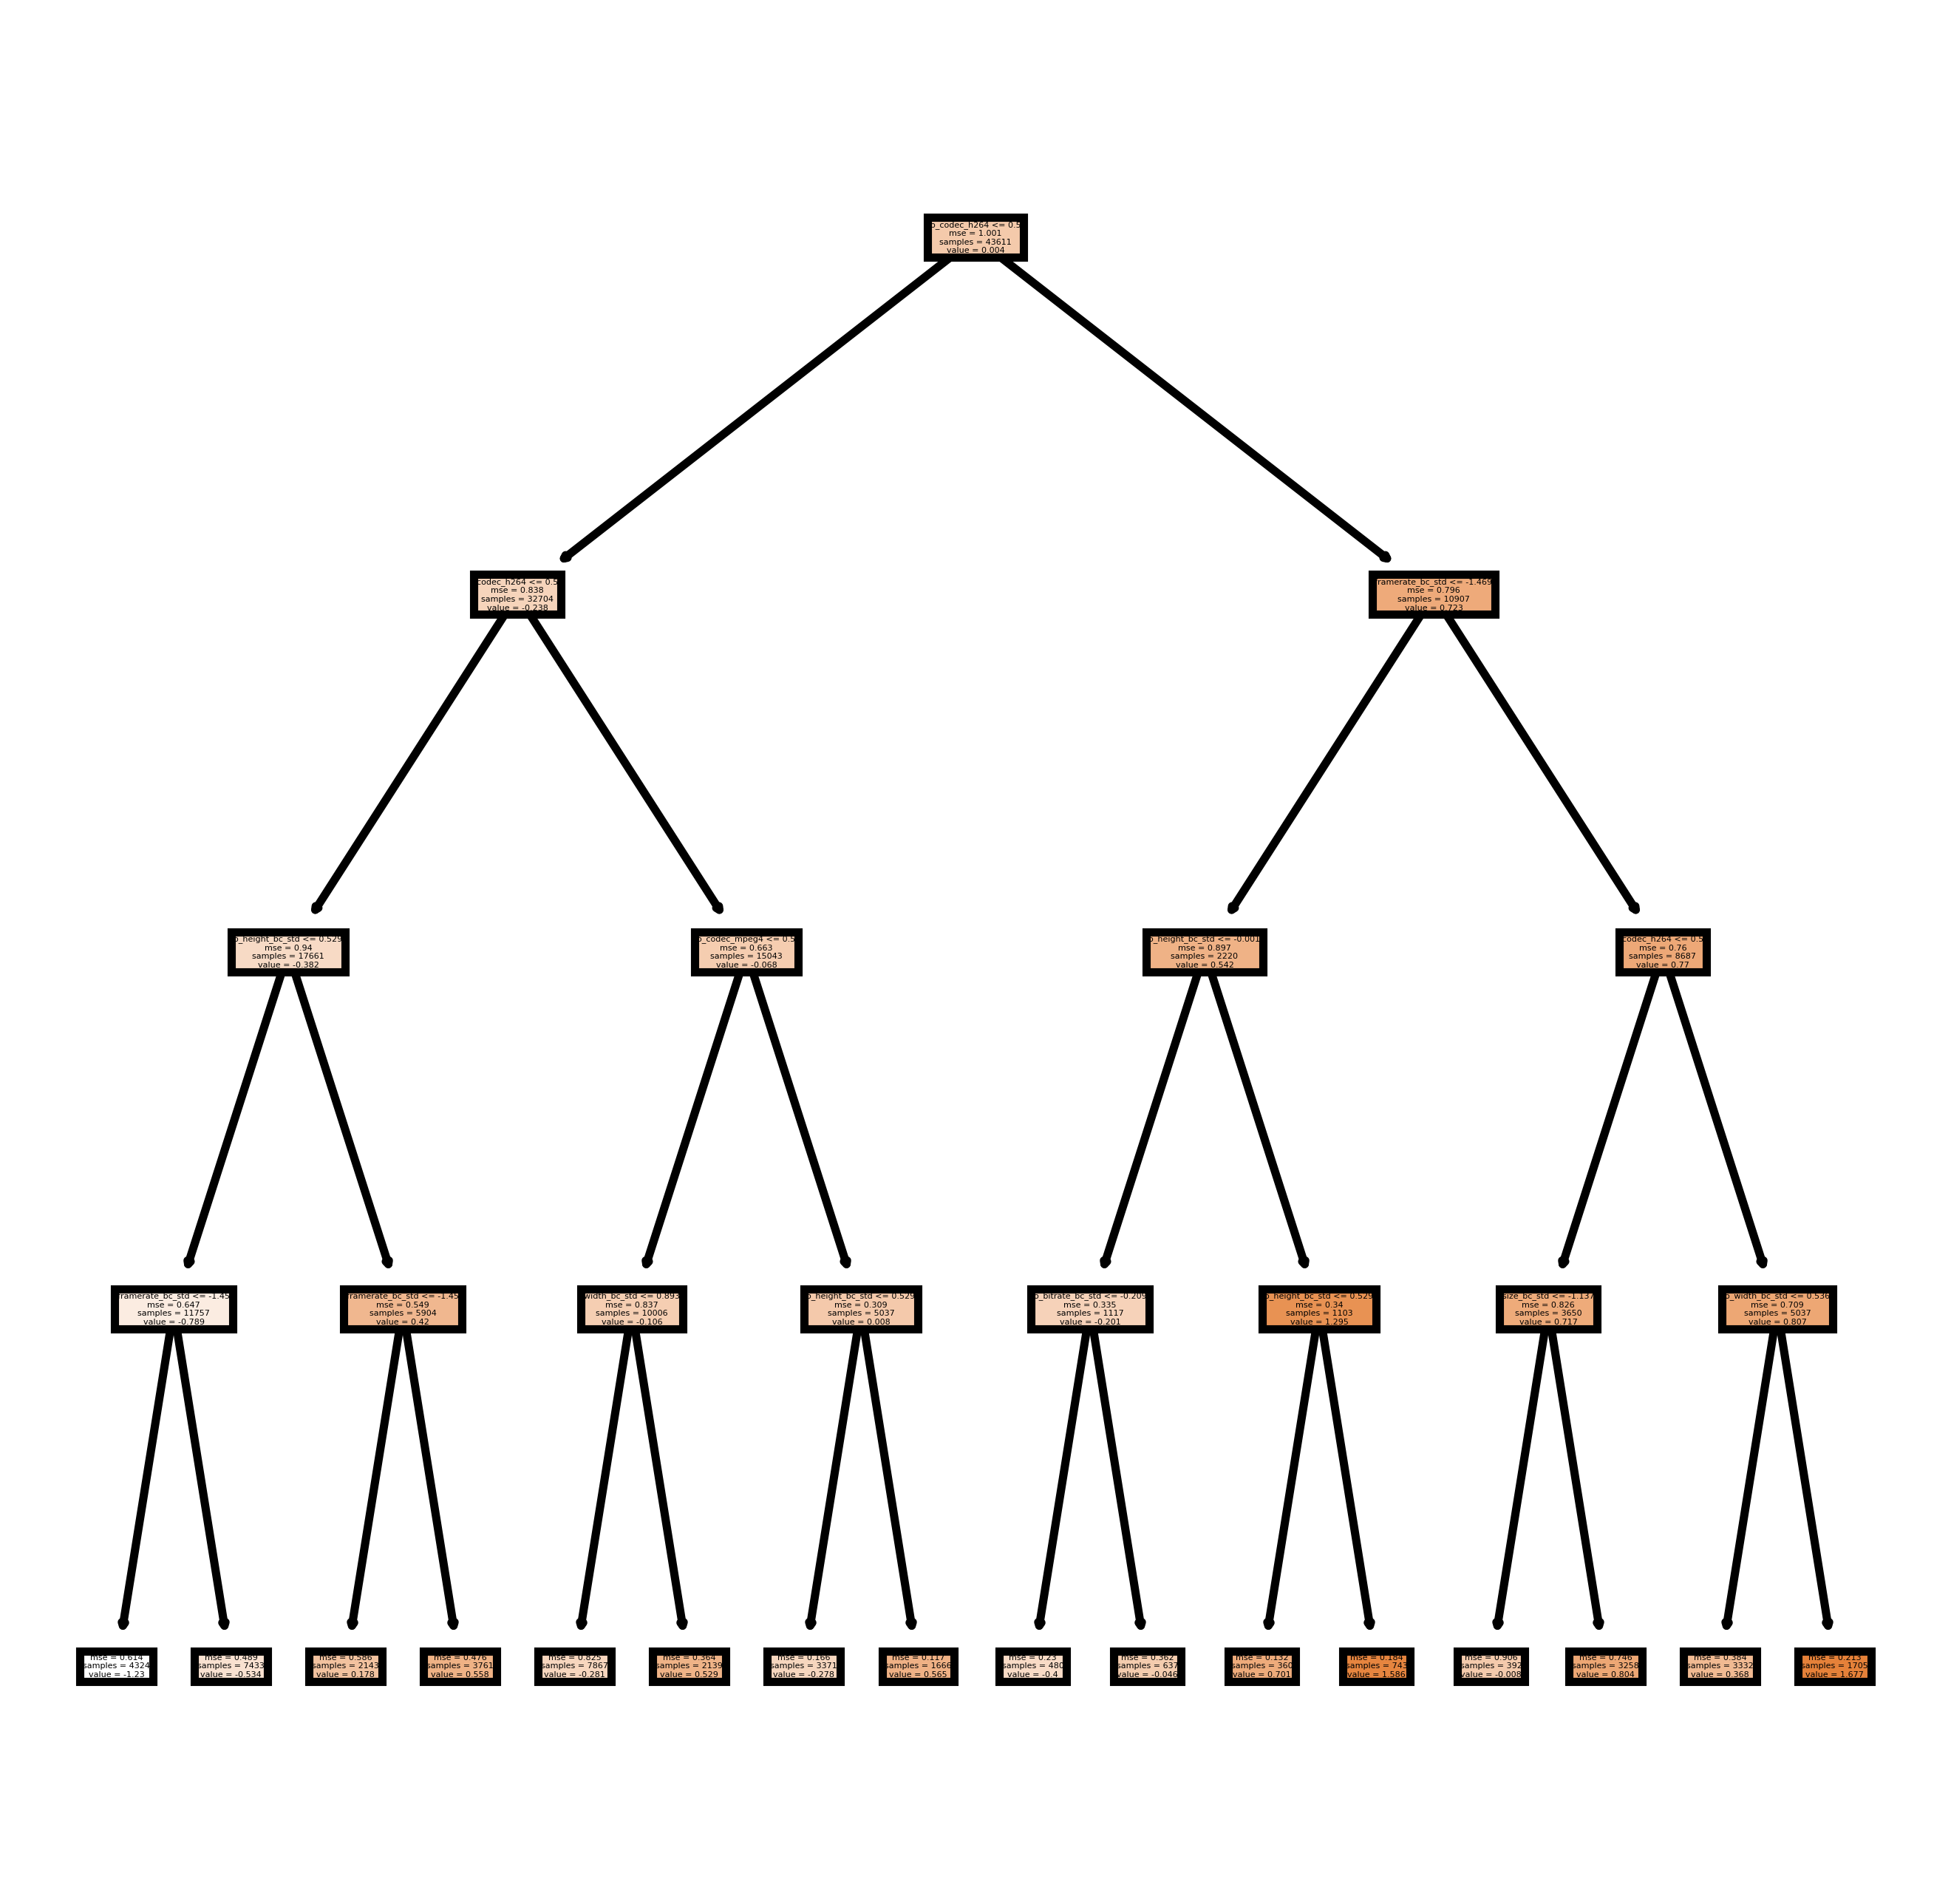

In [39]:
# random forest visualize
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model_max_depth_4[20].estimators_[0],
               feature_names = X.columns, 
               class_names='total count',
               filled = True);

In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'n_estimators': [10, 20, 50, 100, 200, 400],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3, 4, 10, 20, 40, 60, 80, 100],
               'bootstrap': [True]}

# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 10, verbose=2, 
                               scoring='neg_root_mean_squared_error', return_train_score=True, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 4, 10, 20, 40, 60, 80,
                                                      100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 20, 50, 100, 200,
                                                         400]},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

In [44]:
CVres_rf_ran_1 = pd.DataFrame(rf_random.cv_results_)
CVres_rf_ran_1[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_n_estimators',
       'param_max_features',
       'param_max_depth']]

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_max_features,param_max_depth
0,6,-0.213878,-0.031277,100,sqrt,80
1,17,-0.504855,-0.491963,20,auto,4
2,7,-0.214143,-0.029978,200,sqrt,40
3,11,-0.220966,-0.041442,20,sqrt,60
4,1,-0.207504,-0.023540,50,auto,20
5,20,-0.679212,-0.671363,10,log2,3
6,14,-0.237845,-0.052514,10,sqrt,100
7,9,-0.214681,-0.034914,400,sqrt,20
8,13,-0.235869,-0.058712,10,log2,20
9,18,-0.505593,-0.492383,10,auto,4


In [45]:
# Create the random grid
random_grid_2 = {'n_estimators': [20, 30, 40, 50, 60, 100, 200, 400],
               'max_features': ['auto'],
               'max_depth': [4, 10, 20, 40, 60, 80, 100],
               'bootstrap': [True]}

# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 10 fold cross validation, 
rf_random_2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_2, n_iter = 20, cv = 10, verbose=2, 
                               scoring='neg_root_mean_squared_error', return_train_score=True, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_2.fit(X, y)

CVres_rf_ran_2 = pd.DataFrame(rf_random_2.cv_results_)
CVres_rf_ran_2[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_n_estimators',
       'param_max_features',
       'param_max_depth']]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_max_features,param_max_depth
0,20,-0.504855,-0.491963,20,auto,4
1,17,-0.504502,-0.491980,100,auto,4
2,9,-0.207821,-0.023263,30,auto,60
3,1,-0.206452,-0.121498,100,auto,10
4,5,-0.207504,-0.023540,50,auto,20
5,6,-0.207714,-0.022889,40,auto,100
6,3,-0.207409,-0.022490,60,auto,60
7,6,-0.207714,-0.022889,40,auto,40
8,3,-0.207409,-0.022490,60,auto,80
9,2,-0.206839,-0.121602,60,auto,10


In [46]:
# Create the random grid
random_grid_3 = {
    'n_estimators': [40, 50, 60, 70, 80, 90, 100],
    'max_features': ['auto'],
    'max_depth': [8, 10, 12, 15, 20, 40, 60, 80],
    'bootstrap': [True]}

# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 10 fold cross validation, 
rf_random_3 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_3, n_iter = 20, cv = 10, verbose=2, 
                               scoring='neg_root_mean_squared_error', return_train_score=True, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_3.fit(X, y)

CVres_rf_ran_3 = pd.DataFrame(rf_random_3.cv_results_)
CVres_rf_ran_3[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_n_estimators',
       'param_max_features',
       'param_max_depth']]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_max_features,param_max_depth
0,20,-0.235196,-0.181834,40,auto,8
1,18,-0.234794,-0.181567,90,auto,8
2,11,-0.207372,-0.023173,90,auto,20
3,5,-0.206452,-0.121498,100,auto,10
4,2,-0.203258,-0.080526,90,auto,12
5,14,-0.207856,-0.022617,50,auto,80
6,14,-0.207856,-0.022617,50,auto,40
7,4,-0.206090,-0.041372,90,auto,15
8,12,-0.207409,-0.022490,60,auto,60
9,6,-0.206638,-0.121515,90,auto,10


In [47]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [70, 80, 90, 100],
    'max_features': ['auto'],
    'max_depth': [11, 12, 13, 14, 15],
    'bootstrap': [True]
}

# Create a based model
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
gs_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose=2, 
                     scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs = -1)

# Fit the grid search search model
gs_rf.fit(X, y)

CVres_rf_1 = pd.DataFrame(gs_rf.cv_results_)
CVres_rf_1[['rank_test_score',
       'mean_test_score',
       'mean_train_score',
       'param_n_estimators',
       'param_max_features',
       'param_max_depth']]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_max_features,param_max_depth
0,5,-0.203145,-0.099261,70,auto,11
1,1,-0.202964,-0.099260,80,auto,11
2,6,-0.203154,-0.099250,90,auto,11
3,2,-0.203012,-0.099227,100,auto,11
4,4,-0.203100,-0.080556,70,auto,12
5,3,-0.203023,-0.080536,80,auto,12
6,8,-0.203258,-0.080526,90,auto,12
7,7,-0.203212,-0.080499,100,auto,12
8,10,-0.203421,-0.064321,70,auto,13
9,9,-0.203351,-0.064297,80,auto,13


# LightGBM, CatBoost, and Bayesian Optimization: Question 24-26

In [15]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [19]:
data_lgb = lgb.Dataset(data=X, label=y, 
                    feature_name=['duration_bc_std', 'height_bc_std', 'width_bc_std', 'bitrate_bc_std', 'framerate_bc_std',
                                  'i_bc_std', 'p_bc_std', 'b_std', 'frames_bc_std', 'i_size_bc_std', 'p_size_bc_std',
                                  'size_bc_std', 'o_bitrate_bc_std', 'o_framerate_bc_std', 'o_width_bc_std', 'o_height_bc_std',
                                  'codec_h264', 'codec_mpeg4', 'codec_vp8', 'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8'],
                    categorical_feature=['codec_h264', 'codec_mpeg4', 'codec_vp8', 
                                         'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8'])

In [20]:
lgbm_r = lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=6, n_estimators=100, min_data_in_leaf=20,
                           random_state=42, n_jobs=-1, silent=False)

In [21]:
p_lgbm = {
    'num_leaves': [70, 80],
    'min_data_in_leaf': [20, 30],
    'max_depth': [7, 8],
    'n_estimators': [100],
    'learning_rate': [0.1]
}

lgbm_cv = GridSearchCV(estimator=lgbm_r, param_grid=p_lgbm, cv=10, verbose=2,
                       scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs = -1,iid=True)

# Fit the grid search search model
lgbm_cv.fit(X, y)
CVres_lgbm = pd.DataFrame(lgbm_cv.cv_results_)
CVres_lgbm[['rank_test_score', 'mean_test_score', 'mean_train_score',
            'param_num_leaves', 'param_min_data_in_leaf', 'param_max_depth', 'param_n_estimators']]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   55.8s finished
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2206
[LightGBM] [Info] Number of data points in the train set: 68784, number of used features: 22
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,rank_test_score,mean_test_score,mean_train_score,param_num_leaves,param_min_data_in_leaf,param_max_depth,param_n_estimators
0,4,-0.173650,-0.070864,70,20,7,100
1,2,-0.173211,-0.068897,80,20,7,100
2,7,-0.175884,-0.070804,70,30,7,100
3,8,-0.176962,-0.069327,80,30,7,100
4,6,-0.173908,-0.067336,70,20,8,100
5,1,-0.169774,-0.064939,80,20,8,100
6,5,-0.173746,-0.067285,70,30,8,100
7,3,-0.173502,-0.065346,80,30,8,100


In [22]:
from skopt import BayesSearchCV
import sklearn

In [30]:
ss_lgbm = {
    'num_leaves': (70,200),
    'min_data_in_leaf': (10,30),
    'max_depth': (8,10),
    'n_estimators': (100,150),
    'learning_rate': (1e-3, 10)
}

lgbm_bayescv = BayesSearchCV(estimator = lgbm_r, search_spaces = ss_lgbm, n_iter=20, cv=10, verbose=2, random_state=42,
                             scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs = -1)

lgbm_bayescv.fit(X,y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.3s finished


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2206
[LightGBM] [Info] Number of data points in the train set: 68784, number of used features: 22
[LightGBM] [Info] Start training from score 0.000000


BayesSearchCV(cv=10,
              estimator=LGBMRegressor(max_depth=6, min_data_in_leaf=20,
                                      random_state=42, silent=False),
              n_iter=20, n_jobs=-1, random_state=42, return_train_score=True,
              scoring='neg_root_mean_squared_error',
              search_spaces={'learning_rate': (0.001, 10), 'max_depth': (8, 10),
                             'min_data_in_leaf': (10, 30),
                             'n_estimators': (100, 150),
                             'num_leaves': (70, 200)},
              verbose=2)

In [31]:
CVres_lgbm_bayescv = pd.DataFrame(lgbm_bayescv.cv_results_)
CVres_lgbm_bayescv[['rank_test_score', 'mean_test_score', 'mean_train_score',
            'param_num_leaves', 'param_min_data_in_leaf', 'param_max_depth', 'param_n_estimators',
            'param_learning_rate']]

,rank_test_score,mean_test_score,mean_train_score,param_num_leaves,param_min_data_in_leaf,param_max_depth,param_n_estimators,param_learning_rate
0,13,-2.182750e+38,-2.166155e+38,157,29,9,116,4.101629
1,8,-1.495723e+38,-1.484263e+38,182,16,10,148,8.374046
2,7,-1.467461e+38,-1.458651e+38,94,12,10,122,4.448880
3,14,-2.325932e+38,-2.309821e+38,138,22,8,140,8.124147
4,20,-7.210745e+38,-7.158091e+38,188,21,9,136,7.995735
5,17,-3.147755e+38,-3.121234e+38,174,13,10,109,7.340546
6,18,-3.384966e+38,-3.351541e+38,147,17,10,144,6.171177
7,6,-1.434694e+38,-1.424603e+38,112,20,10,142,5.434487
8,9,-1.636287e+38,-1.625445e+38,120,27,9,121,9.554824
9,1,-1.807114e-01,-7.993988e-02,145,25,10,113,0.037299


In [32]:
ss_lgbm_1 = {
    'num_leaves': (70,80),
    'min_data_in_leaf': (20,30),
    'max_depth': (7,8),
    'n_estimators': (100,101),
    'learning_rate': (0.1, 1)
}

lgbm_bayescv_1 = BayesSearchCV(estimator = lgbm_r, search_spaces = ss_lgbm_1, n_iter=20, cv=10, verbose=2, random_state=42,
                             scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs = -1)

lgbm_bayescv_1.fit(X,y)

CVres_lgbm_bayescv_1 = pd.DataFrame(lgbm_bayescv_1.cv_results_)
CVres_lgbm_bayescv_1[['rank_test_score', 'mean_test_score', 'mean_train_score',
            'param_num_leaves', 'param_min_data_in_leaf', 'param_max_depth', 'param_n_estimators',
            'param_learning_rate']]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished
/Users/ryanli/.pyenv/versions/3.6.13/envs/venv_219/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.6s finished


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2206
[LightGBM] [Info] Number of data points in the train set: 68784, number of used features: 22
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,rank_test_score,mean_test_score,mean_train_score,param_num_leaves,param_min_data_in_leaf,param_max_depth,param_n_estimators,param_learning_rate
0,12,-0.201516,-0.057015,77,29,8,100,0.469094
1,19,-0.248177,-0.056782,79,23,8,101,0.853650
2,13,-0.210569,-0.057138,72,21,8,100,0.500349
3,17,-0.240302,-0.061913,75,26,7,101,0.831156
4,18,-0.242811,-0.061476,79,25,7,101,0.819598
5,16,-0.235933,-0.055787,78,22,8,100,0.760625
6,14,-0.221812,-0.055972,76,24,8,101,0.655371
7,15,-0.224317,-0.056090,73,25,8,101,0.589063
8,20,-0.253592,-0.059390,74,29,8,100,0.959930
9,3,-0.173255,-0.065647,76,27,8,100,0.103267


In [34]:
ss_lgbm_2 = {
    'num_leaves': (70,200),
    'min_data_in_leaf': (10,30),
    'max_depth': (8,10),
    'n_estimators': (100,150),
    'learning_rate': (1e-3, 10)
}

lgbm_bayescv_2 = BayesSearchCV(estimator = lgbm_r, search_spaces = ss_lgbm_2, n_iter=50, cv=10, verbose=2, random_state=42,
                             scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs = -1)

lgbm_bayescv_2.fit(X,y)

CVres_lgbm_bayescv_2 = pd.DataFrame(lgbm_bayescv_2.cv_results_)
CVres_lgbm_bayescv_2[['rank_test_score', 'mean_test_score', 'mean_train_score',
            'param_num_leaves', 'param_min_data_in_leaf', 'param_max_depth', 'param_n_estimators',
            'param_learning_rate']]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.4s finished


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2206
[LightGBM] [Info] Number of data points in the train set: 68784, number of used features: 22
[LightGBM] [Info] Start training from score 0.000000


,rank_test_score,mean_test_score,mean_train_score,param_num_leaves,param_min_data_in_leaf,param_max_depth,param_n_estimators,param_learning_rate
0,32,-2.182750e+38,-2.166155e+38,157,29,9,116,4.101629
1,19,-1.495723e+38,-1.484263e+38,182,16,10,148,8.374046
2,18,-1.467461e+38,-1.458651e+38,94,12,10,122,4.448880
3,33,-2.325932e+38,-2.309821e+38,138,22,8,140,8.124147
4,48,-7.210745e+38,-7.158091e+38,188,21,9,136,7.995735
5,37,-3.147755e+38,-3.121234e+38,174,13,10,109,7.340546
6,39,-3.384966e+38,-3.351541e+38,147,17,10,144,6.171177
7,15,-1.434694e+38,-1.424603e+38,112,20,10,142,5.434487
8,21,-1.636287e+38,-1.625445e+38,120,27,9,121,9.554824
9,1,-1.807114e-01,-7.993988e-02,145,25,10,113,0.037299


In [35]:
ss_lgbm_3 = {
    'num_leaves': (20,200),
    'min_data_in_leaf': (10,30),
    'max_depth': (8,10),
    'n_estimators': (100,150),
    'learning_rate': (1e-3, 2)
}

lgbm_bayescv_3 = BayesSearchCV(estimator = lgbm_r, search_spaces = ss_lgbm_3, n_iter=50, cv=10, verbose=2, random_state=42,
                             scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs = -1)

lgbm_bayescv_3.fit(X,y)

CVres_lgbm_bayescv_3 = pd.DataFrame(lgbm_bayescv_3.cv_results_)
CVres_lgbm_bayescv_3[['rank_test_score', 'mean_test_score', 'mean_train_score',
            'param_num_leaves', 'param_min_data_in_leaf', 'param_max_depth', 'param_n_estimators',
            'param_learning_rate']]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2206
[LightGBM] [Info] Number of data points in the train set: 68784, number of used features: 22
[LightGBM] [Info] Start training from score 0.000000


,rank_test_score,mean_test_score,mean_train_score,param_num_leaves,param_min_data_in_leaf,param_max_depth,param_n_estimators,param_learning_rate
0,41,-0.244393,-0.045858,141,29,9,116,0.820798
1,48,-0.438136,-0.059882,176,16,10,148,1.674939
2,42,-0.265243,-0.053279,54,12,10,122,0.890220
3,47,-0.401940,-0.073939,114,22,8,140,1.624980
4,46,-0.394754,-0.058763,183,21,9,136,1.599307
5,45,-0.381386,-0.054979,164,13,10,109,1.468322
6,44,-0.322722,-0.046164,127,17,10,144,1.234542
7,43,-0.288781,-0.052288,78,20,10,142,1.087263
8,50,-0.566614,-0.127569,89,27,9,121,1.911000
9,49,-0.443200,-0.427347,124,25,10,113,0.008257
